# 2 Data wrangling<a id='2_Data_wrangling'></a>

## 2.1 Contents<a id='2.1_Contents'></a>
* [2 Data wrangling](#2_Data_wrangling)
  * [2.1 Contents](#2.1_Contents)
  * [2.2 Introduction](#2.2_Introduction)
    * [2.2.1 Recap Of Data Science Problem](#2.2.1_Recap_Of_Data_Science_Problem)
    * [2.2.2 Introduction To Notebook](#2.2.2_Introduction_To_Notebook)
  * [2.3 Imports](#2.3_Imports)
  * [2.4 Objectives](#2.4_Objectives)
  * [2.5 Load The Ski Resort Data](#2.5_Load_The_Ski_Resort_Data)
  * [2.6 Explore The Data](#2.6_Explore_The_Data)
    * [2.6.1 Find Your Resort Of Interest](#2.6.1_Find_Your_Resort_Of_Interest)
    * [2.6.2 Number Of Missing Values By Column](#2.6.2_Number_Of_Missing_Values_By_Column)
    * [2.6.3 Categorical Features](#2.6.3_Categorical_Features)
      * [2.6.3.1 Unique Resort Names](#2.6.3.1_Unique_Resort_Names)
      * [2.6.3.2 Region And State](#2.6.3.2_Region_And_State)
      * [2.6.3.3 Number of distinct regions and states](#2.6.3.3_Number_of_distinct_regions_and_states)
      * [2.6.3.4 Distribution Of Resorts By Region And State](#2.6.3.4_Distribution_Of_Resorts_By_Region_And_State)
      * [2.6.3.5 Distribution Of Ticket Price By State](#2.6.3.5_Distribution_Of_Ticket_Price_By_State)
        * [2.6.3.5.1 Average weekend and weekday price by state](#2.6.3.5.1_Average_weekend_and_weekday_price_by_state)
        * [2.6.3.5.2 Distribution of weekday and weekend price by state](#2.6.3.5.2_Distribution_of_weekday_and_weekend_price_by_state)
    * [2.6.4 Numeric Features](#2.6.4_Numeric_Features)
      * [2.6.4.1 Numeric data summary](#2.6.4.1_Numeric_data_summary)
      * [2.6.4.2 Distributions Of Feature Values](#2.6.4.2_Distributions_Of_Feature_Values)
        * [2.6.4.2.1 SkiableTerrain_ac](#2.6.4.2.1_SkiableTerrain_ac)
        * [2.6.4.2.2 Snow Making_ac](#2.6.4.2.2_Snow_Making_ac)
        * [2.6.4.2.3 fastEight](#2.6.4.2.3_fastEight)
        * [2.6.4.2.4 fastSixes and Trams](#2.6.4.2.4_fastSixes_and_Trams)
  * [2.7 Derive State-wide Summary Statistics For Our Market Segment](#2.7_Derive_State-wide_Summary_Statistics_For_Our_Market_Segment)
  * [2.8 Drop Rows With No Price Data](#2.8_Drop_Rows_With_No_Price_Data)
  * [2.9 Review distributions](#2.9_Review_distributions)
  * [2.10 Population data](#2.10_Population_data)
  * [2.11 Target Feature](#2.11_Target_Feature)
    * [2.11.1 Number Of Missing Values By Row - Resort](#2.11.1_Number_Of_Missing_Values_By_Row_-_Resort)
  * [2.12 Save data](#2.12_Save_data)
  * [2.13 Summary](#2.13_Summary)


## 2.2 Introduction<a id='2.2_Introduction'></a>

This step focuses on collecting your data, organizing it, and making sure it's well defined. Paying attention to these tasks will pay off greatly later on. Some data cleaning can be done at this stage, but it's important not to be overzealous in your cleaning before you've explored the data to better understand it.

### 2.2.1 Recap Of Data Science Problem<a id='2.2.1_Recap_Of_Data_Science_Problem'></a>

The purpose of this data science project is to come up with a pricing model for ski resort tickets in our market segment. Big Mountain suspects it may not be maximizing its returns, relative to its position in the market. It also does not have a strong sense of what facilities matter most to visitors, particularly which ones they're most likely to pay more for. This project aims to build a predictive model for ticket price based on a number of facilities, or properties, boasted by resorts (*at the resorts).* 
This model will be used to provide guidance for Big Mountain's pricing and future facility investment plans.

### 2.2.2 Introduction To Notebook<a id='2.2.2_Introduction_To_Notebook'></a>

Notebooks grow organically as we explore our data. If you used paper notebooks, you could discover a mistake and cross out or revise some earlier work. Later work may give you a reason to revisit earlier work and explore it further. The great thing about Jupyter notebooks is that you can edit, add, and move cells around without needing to cross out figures or scrawl in the margin. However, this means you can lose track of your changes easily. If you worked in a regulated environment, the company may have a a policy of always dating entries and clearly crossing out any mistakes, with your initials and the date.

**Best practice here is to commit your changes using a version control system such as Git.** Try to get into the habit of adding and committing your files to the Git repository you're working in after you save them. You're are working in a Git repository, right? If you make a significant change, save the notebook and commit it to Git. In fact, if you're about to make a significant change, it's a good idea to commit before as well. Then if the change is a mess, you've got the previous version to go back to.

**Another best practice with notebooks is to try to keep them organized with helpful headings and comments.** Not only can a good structure, but associated headings help you keep track of what you've done and your current focus. Anyone reading your notebook will have a much easier time following the flow of work. Remember, that 'anyone' will most likely be you. Be kind to future you!

In this notebook, note how we try to use well structured, helpful headings that frequently are self-explanatory, and we make a brief note after any results to highlight key takeaways. This is an immense help to anyone reading your notebook and it will greatly help you when you come to summarise your findings. **Top tip: jot down key findings in a final summary at the end of the notebook as they arise. You can tidy this up later.** This is a great way to ensure important results don't get lost in the middle of your notebooks.

In this, and subsequent notebooks, there are coding tasks marked with `#Code task n#` with code to complete. The `___` will guide you to where you need to insert code.

## 2.3 Imports<a id='2.3_Imports'></a>

Placing your imports all together at the start of your notebook means you only need to consult one place to check your notebook's dependencies. By all means import something 'in situ' later on when you're experimenting, but if the imported dependency ends up being kept, you should subsequently move the import statement here with the rest.

In [1]:
#Code task 1#
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

from library.sb_utils import save_file


## 2.4 Objectives<a id='2.4_Objectives'></a>

There are some fundamental questions to resolve in this notebook before you move on.

* Do you think you may have the data you need to tackle the desired question?
    * Have you identified the required target value?
    * Do you have potentially useful features?
* Do you have any fundamental issues with the data?

## 2.5 Load The Ski Resort Data<a id='2.5_Load_The_Ski_Resort_Data'></a>

In [2]:
# the supplied CSV data file is the raw_data directory
ski_data = pd.read_csv('../raw_data/ski_resort_data.csv')

Good first steps in auditing the data are the info method and displaying the first few records with head.

In [3]:
#Code task 2#
#Call the info method on ski_data to see a summary of the data
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               330 non-null    object 
 1   Region             330 non-null    object 
 2   state              330 non-null    object 
 3   summit_elev        330 non-null    int64  
 4   vertical_drop      330 non-null    int64  
 5   base_elev          330 non-null    int64  
 6   trams              330 non-null    int64  
 7   fastEight          164 non-null    float64
 8   fastSixes          330 non-null    int64  
 9   fastQuads          330 non-null    int64  
 10  quad               330 non-null    int64  
 11  triple             330 non-null    int64  
 12  double             330 non-null    int64  
 13  surface            330 non-null    int64  
 14  total_chairs       330 non-null    int64  
 15  Runs               326 non-null    float64
 16  TerrainParks       279 non

`AdultWeekday` is the price of an adult weekday ticket. `AdultWeekend` is the price of an adult weekend ticket. The other columns are potential features.

This immediately raises the question of what quantity will you want to model? You know you want to model the ticket price, but you realise there are two kinds of ticket price!

In [4]:
#Code task 3#
#Call the head method on ski_data to print the first several rows of the data
ski_data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


The output above suggests you've made a good start getting the ski resort data organized. You have plausible column headings. You can already see you have a missing value in the `fastEight` column

## 2.6 Explore The Data<a id='2.6_Explore_The_Data'></a>

### 2.6.1 Find Your Resort Of Interest<a id='2.6.1_Find_Your_Resort_Of_Interest'></a>

Your resort of interest is called Big Mountain Resort. Check it's in the data:

In [5]:
#Code task 4#
#Filter the ski_data dataframe to display just the row for our resort with the name 'Big Mountain Resort'
#Hint: you will find that the transpose of the row will give a nicer output. DataFrame's do have a
#transpose method, but you can access this conveniently with the `T` property.
ski_data[ski_data.Name == 'Big Mountain Resort'].T

,151
Name,Big Mountain Resort
Region,Montana
state,Montana
summit_elev,6817
vertical_drop,2353
base_elev,4464
trams,0
fastEight,0.0
fastSixes,0
fastQuads,3


It's good that your resort doesn't appear to have any missing values.

### 2.6.2 Number Of Missing Values By Column<a id='2.6.2_Number_Of_Missing_Values_By_Column'></a>

Count the number of missing values in each column and sort them.

In [6]:
#Code task 5#
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#ski_data as well as the percentages (using `.mean()` instead of `.sum()`).
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'
missing = pd.concat([ski_data.isnull().sum(), 100 * ski_data.isnull().mean()], axis=1)   #axis=1 merges/concats horizontally, i.e. side-by-side

#using .mean() * 100 is an interesting way of getting the percentage blanks. .isnull() is making 0's and 1's, 0 for non-blanks and 1 for
#true actual blanks. so rather than do the sum of blanks/trues divided by the count (total num of items in column),
#the average will do the same thing because average is the sum of all values divided by the number of values. this works since
#the only values we have are 1's and everything else is 0. the number of blanks = the sum of all numbers in the column

missing.columns=['count', '%']  #adds column titles cuz by default when you concat will just be '0', '1' column headers

missing = missing.sort_values('count', ascending=False)

missing

,count,%
fastEight,166,50.303030
NightSkiing_ac,143,43.333333
AdultWeekday,54,16.363636
AdultWeekend,51,15.454545
daysOpenLastYear,51,15.454545
TerrainParks,51,15.454545
projectedDaysOpen,47,14.242424
Snow Making_ac,46,13.939394
averageSnowfall,14,4.242424
LongestRun_mi,5,1.515152


`fastEight` has the most missing values, at just over 50%. Unfortunately, you see you're also missing quite a few of your desired target quantity, the ticket price, which is missing 15-16% of values. `AdultWeekday` is missing in a few more records than `AdultWeekend`. What overlap is there in these missing values? This is a question you'll want to investigate. You should also point out that `isnull()` is not the only indicator of missing data. Sometimes 'missingness' can be encoded, perhaps by a -1 or 999. Such values are typically chosen because they are "obviously" not genuine values. If you were capturing data on people's heights and weights but missing someone's height, you could certainly encode that as a 0 because no one has a height of zero (in any units). Yet such entries would not be revealed by `isnull()`. Here, you need a data dictionary and/or to spot such values as part of looking for outliers. Someone with a height of zero should definitely show up as an outlier!

In [7]:
#overlap - so blanks exist on the same record
#find ways to capture outliers and group them into the group of blanks - cuz all are essentially missing or no good values

### 2.6.3 Categorical Features<a id='2.6.3_Categorical_Features'></a>

So far you've examined only the numeric features. Now you inspect categorical ones such as resort name and state. These are discrete entities. 'Alaska' is a name. Although names can be sorted alphabetically, it makes no sense to take the average of 'Alaska' and 'Arizona'. Similarly, 'Alaska' is before 'Arizona' only lexicographically; it is neither 'less than' nor 'greater than' 'Arizona'. As such, they tend to require different handling than strictly numeric quantities. Note, a feature _can_ be numeric but also categorical. For example, instead of giving the number of `fastEight` lifts, a feature might be `has_fastEights` and have the value 0 or 1 to denote absence or presence of such a lift. In such a case it would not make sense to take an average of this or perform other mathematical calculations on it. Although you digress a little to make a point, month numbers are also, strictly speaking, categorical features. Yes, when a month is represented by its number (1 for January, 2 for Februrary etc.) it provides a convenient way to graph trends over a year. And, arguably, there is some logical interpretation of the average of 1 and 3 (January and March) being 2 (February). However, clearly December of one years precedes January of the next and yet 12 as a number is not less than 1. The numeric quantities in the section above are truly numeric; they are the number of feet in the drop, or acres or years open or the amount of snowfall etc.

In [8]:
#Code task 6#
#Use ski_data's `select_dtypes` method to select columns of dtype 'object'
ski_data.select_dtypes('object')

#as we saw in Code Task #2, it's the first 3 columns

,Name,Region,state
0,Alyeska Resort,Alaska,Alaska
1,Eaglecrest Ski Area,Alaska,Alaska
2,Hilltop Ski Area,Alaska,Alaska
3,Arizona Snowbowl,Arizona,Arizona
4,Sunrise Park Resort,Arizona,Arizona
...,...,...,...
325,Meadowlark Ski Lodge,Wyoming,Wyoming
326,Sleeping Giant Ski Resort,Wyoming,Wyoming
327,Snow King Resort,Wyoming,Wyoming
328,Snowy Range Ski & Recreation Area,Wyoming,Wyoming


You saw earlier on that these three columns had no missing values. But are there any other issues with these columns? Sensible questions to ask here include:

* Is `Name` (or at least a combination of Name/Region/State) unique?
* Is `Region` always the same as `state`?

In [9]:
#(1) So THERE IS a duplicate name - Crystal Mountain!! but when combined w/ / when looking at pair of name-state they're unique (Mich & Wash)

#(2) It mostly is but No - Region is not always the same as State. Like Sierra Nevada & California/Nevada

#### 2.6.3.1 Unique Resort Names<a id='2.6.3.1_Unique_Resort_Names'></a>

In [10]:
#Code task 7#
#Use pandas' Series method `value_counts` to find any duplicated resort names
ski_data['Name'].value_counts().head()
#automatically sorted from high to low

Crystal Mountain    2
Alyeska Resort      1
Brandywine          1
Boston Mills        1
Alpine Valley       1
Name: Name, dtype: int64

You have a duplicated resort name: Crystal Mountain.

**Q: 1** Is this resort duplicated if you take into account Region and/or state as well?

In [11]:
#Answer 1: No, as stated above, if we combine w/ State or Region and make it a pair, they'd be unique (one is in Michigan and one is in Washington)

In [12]:
#Code task 8#
#Concatenate the string columns 'Name' and 'Region' and count the values again (as above)
(ski_data['Name'] + ', ' + ski_data['Region']).value_counts().head()

Alyeska Resort, Alaska    1
Snow Trails, Ohio         1
Brandywine, Ohio          1
Boston Mills, Ohio        1
Alpine Valley, Ohio       1
dtype: int64

In [13]:
#Code task 9#
#Concatenate 'Name' and 'state' and count the values again (as above)
(ski_data['Name'] + ', ' + ski_data['state']).value_counts().head()

Alyeska Resort, Alaska    1
Snow Trails, Ohio         1
Brandywine, Ohio          1
Boston Mills, Ohio        1
Alpine Valley, Ohio       1
dtype: int64

In [14]:
#We could've also inserted a new column w/ the concatted name

In [15]:
#**NB** because you know `value_counts()` sorts descending, you can use the `head()` method and know the rest of the counts must be 1.

In [16]:
#^yep, i realized that

**A: 1** No, as stated above, if we combine Name w/ State or Region as a pair, they'd all be unique (one of the Crystal Mountain's is in Michigan and the other is in Washington)

In [17]:
ski_data[ski_data['Name'] == 'Crystal Mountain']

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
104,Crystal Mountain,Michigan,Michigan,1132,375,757,0,0.0,0,1,...,0.3,102.0,96.0,120.0,63.0,132.0,54.0,64.0,135.0,56.0
295,Crystal Mountain,Washington,Washington,7012,3100,4400,1,NaN,2,2,...,2.5,2600.0,10.0,NaN,57.0,486.0,99.0,99.0,NaN,NaN


So there are two Crystal Mountain resorts, but they are clearly two different resorts in two different states. This is a powerful signal that you have unique records on each row.

#### 2.6.3.2 Region And State<a id='2.6.3.2_Region_And_State'></a>

What's the relationship between region and state?

You know they are the same in many cases (e.g. both the Region and the state are given as 'Michigan'). In how many cases do they differ?

In [18]:
#Code task 10#
#Calculate the number of times Region does not equal state
(ski_data.Region != ski_data.state).sum()

33

In [19]:
#Get the specific ones:
ski_data[ski_data['state']!=ski_data['Region']][['Name','state','Region']]

,Name,state,Region
5,Yosemite Ski & Snowboard Area,California,Northern California
6,Bear Mountain,California,Sierra Nevada
7,Bear Valley,California,Sierra Nevada
8,Boreal Mountain Resort,California,Sierra Nevada
9,Dodge Ridge,California,Sierra Nevada
10,Donner Ski Ranch,California,Sierra Nevada
11,Heavenly Mountain Resort,California,Sierra Nevada
12,June Mountain,California,Sierra Nevada
13,Kirkwood,California,Sierra Nevada
14,Mammoth Mountain Ski Area,California,Sierra Nevada


You know what a state is. What is a region? You can tabulate the distinct values along with their respective frequencies using `value_counts()`.

In [20]:
ski_data['Region'].value_counts()
#this lets you see the 'leaderboard' too

New York               33
Michigan               29
Sierra Nevada          22
Colorado               22
Pennsylvania           19
Wisconsin              16
New Hampshire          16
Vermont                15
Minnesota              14
Idaho                  12
Montana                12
Massachusetts          11
Washington             10
New Mexico              9
Maine                   9
Wyoming                 8
Utah                    7
Salt Lake City          6
North Carolina          6
Oregon                  6
Connecticut             5
Ohio                    5
Virginia                4
West Virginia           4
Illinois                4
Mt. Hood                4
Alaska                  3
Iowa                    3
South Dakota            2
Arizona                 2
Nevada                  2
Missouri                2
Indiana                 2
New Jersey              2
Rhode Island            1
Tennessee               1
Maryland                1
Northern California     1
Name: Region

In [21]:
#Maybe Sierra Nevada makes sense, but isn't that also Northern California for the California ones?
#and then Salt Lake City is confusing for a region since there's also a Utah...
#similar w/ Mt. Hood & Oregon

A casual inspection by eye reveals some non-state names such as Sierra Nevada, Salt Lake City, and Northern California. Tabulate the differences between Region and state. On a note regarding scaling to larger data sets, you might wonder how you could spot such cases when presented with millions of rows. This is an interesting point. Imagine you have access to a database with a Region and state column in a table and there are millions of rows. You wouldn't eyeball all the rows looking for differences! Bear in mind that our first interest lies in establishing the answer to the question "Are they always the same?" One approach might be to ask the database to return records where they differ, but limit the output to 10 rows. If there were differences, you'd only get up to 10 results, and so you wouldn't know whether you'd located all differences, but you'd know that there were 'a nonzero number' of differences. If you got an empty result set back, then you would know that the two columns always had the same value. At the risk of digressing, some values in one column only might be NULL (missing) and different databases treat NULL differently, so be aware that on many an occasion a seamingly 'simple' question gets very interesting to answer very quickly!

In [22]:
# to address this^, you could signif reduce the amt to look at by condensing it down to the Region-State pairs:
mismatches = ski_data[ski_data['state']!=ski_data['Region']][['Name','state','Region']]
mismatches['State-Region'] = mismatches['state'] + '-' + mismatches['Region']
mismatches['State-Region'].value_counts()

#or:
#mismatches['State-Region'].drop_duplicates()

California-Sierra Nevada          20
Utah-Salt Lake City                6
Oregon-Mt. Hood                    4
Nevada-Sierra Nevada               2
California-Northern California     1
Name: State-Region, dtype: int64

In [23]:
#Code task 11#
#Filter the ski_data dataframe for rows where 'Region' and 'state' are different,

#did that above w/:
#ski_data[ski_data['state']!=ski_data['Region']][['Name','state','Region']]

#Then group that by 'state' and perform `value_counts` on the 'Region'
ski_data[ski_data.state != ski_data.Region].groupby('state')['Region'].value_counts()

#this groups it by state, then sub-group by region to give all the affiliated pairs and then gives the count of each of those combos

#normally like to do sort_values for high to low but then that ruins the nice grouping you have here

state       Region             
California  Sierra Nevada          20
            Northern California     1
Nevada      Sierra Nevada           2
Oregon      Mt. Hood                4
Utah        Salt Lake City          6
Name: Region, dtype: int64

The vast majority of the differences are in California, with most Regions being called Sierra Nevada and just one referred to as Northern California.

#### 2.6.3.3 Number of distinct regions and states<a id='2.6.3.3_Number_of_distinct_regions_and_states'></a>

In [24]:
#Code task 12#
#Select the 'Region' and 'state' columns from ski_data and use the `nunique` method to calculate
#the number of unique values in each
ski_data[['Region', 'state']].nunique()

Region    38
state     35
dtype: int64

Because a few states are split across multiple named regions, there are slightly more unique regions than states.

#### 2.6.3.4 Distribution Of Resorts By Region And State<a id='2.6.3.4_Distribution_Of_Resorts_By_Region_And_State'></a>

If this is your first time using [matplotlib](https://matplotlib.org/3.2.2/index.html)'s [subplots](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.subplots.html), you may find the online documentation useful.

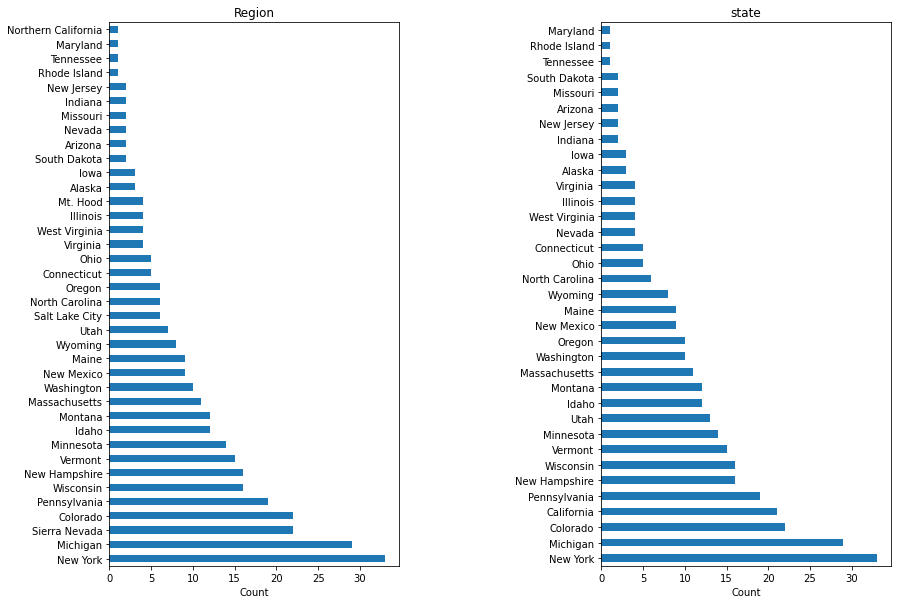

In [25]:
#Code task 13#
#So this is gonna give us 2 plots side-by-side:
#1: A long horizontal bar chart of the region counts (hist)
#2: The same thing but for states

#Create two subplots on 1 row and 2 columns with a figsize of (12, 8)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,10)) #fig size is WIDTH by LENGTH of the plots
#You first 'initialize' / plan / lay out the overall mapping / graphing / plotting
#'field' by specifying the number of plots you want/plan to have, then later can fill in the specifics

#Specify a horizontal barplot ('barh') as kind of plot (kind=)
ski_data.Region.value_counts().plot(kind='barh', ax=ax[0])   #we're telling it that we wanna assign this to the first (0th index) of the 2
#plots we created/assigned/reserved, now we wanna fill that empty plot (there's two plots because we specified 1 row w/ 2 columns i.e. 1 x 2)
#Give the plot a helpful title of 'Region'
ax[0].set_title('Region')
#Label the xaxis 'Count'
ax[0].set_xlabel('Count')
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
ski_data.state.value_counts().plot(kind='barh', ax=ax[1])
#Give the plot a helpful title of 'state'
ax[1].set_title('state')
#Label the xaxis 'Count'
ax[1].set_xlabel('Count')
#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(wspace=.7)  #This adjusts the amount of space BETWEEN PLOTS

#You're encouraged to explore a few different figure sizes, orientations, and spacing here
# as the importance of easy-to-read and informative figures is frequently understated
# and you will find the ability to tweak figures invaluable later on

How's your geography? Looking at the distribution of States, you see New York accounting for the majority of resorts. Our target resort is in Montana, which comes in at 13th place. You should think carefully about how, or whether, you use this information. Does New York command a premium because of its proximity to population? Even if a resort's State were a useful predictor of ticket price, your main interest lies in Montana. Would you want a model that is skewed for accuracy by New York? Should you just filter for Montana and create a Montana-specific model? This would slash your available data volume. Your problem task includes the contextual insight that the data are for resorts all belonging to the same market share. This suggests one might expect prices to be similar amongst them. You can look into this. A boxplot grouped by State is an ideal way to quickly compare prices. Another side note worth bringing up here is that, in reality, the best approach here definitely would include consulting with the client or other domain expert. They might know of good reasons for treating states equivalently or differently. The data scientist is rarely the final arbiter of such a decision. But here, you'll see if we can find any supporting evidence for treating states the same or differently.

In [26]:
#Montana is 12th place by State actually
#Rank:
ski_counts = ski_data['state'].value_counts()
ski_counts_df = pd.DataFrame(ski_counts)
ski_counts_df.reset_index(inplace=True)
ski_counts_df.index += 1
ski_counts_df

,index,state
1,New York,33
2,Michigan,29
3,Colorado,22
4,California,21
5,Pennsylvania,19
6,New Hampshire,16
7,Wisconsin,16
8,Vermont,15
9,Minnesota,14
10,Utah,13


In [27]:
#But yes it's good that we have fewer resorts in the state to compete with and try to stand out from

#### 2.6.3.5 Distribution Of Ticket Price By State<a id='2.6.3.5_Distribution_Of_Ticket_Price_By_State'></a>

Our primary focus is our Big Mountain resort, in Montana. Does the state give you any clues to help decide what your primary target response feature should be (weekend or weekday ticket prices)?

In [28]:
# These are the 11 scrubs we have to compete with in Montana (we're the 12th, but we're No.1) (lol LITERALLY, when we sort by name alphab)
montana = ski_data[ski_data['state']=='Montana']
montana = montana.sort_values('Name')
montana = montana.reset_index(drop=True)
montana.index+=1
montana


,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
1,Big Mountain Resort,Montana,Montana,6817,2353,4464,0,0.0,0,3,...,3.3,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0
2,Big Sky Resort,Montana,Montana,11166,4350,7500,1,1.0,2,5,...,6.0,5800.0,400.0,144.0,46.0,400.0,NaN,NaN,144.0,NaN
3,Blacktail Mountain Ski Area,Montana,Montana,6676,1440,5236,0,NaN,0,0,...,0.7,1000.0,NaN,NaN,21.0,250.0,42.0,42.0,NaN,NaN
4,Bridger Bowl,Montana,Montana,8700,2600,6100,0,0.0,0,0,...,1.5,2000.0,100.0,122.0,64.0,350.0,63.0,63.0,133.0,NaN
5,Discovery Ski Area,Montana,Montana,8150,2380,5770,0,0.0,0,0,...,1.5,2400.0,25.0,116.0,46.0,225.0,49.0,49.0,116.0,NaN
6,Great Divide,Montana,Montana,7330,1580,5750,0,0.0,0,0,...,3.0,1600.0,150.0,94.0,78.0,180.0,48.0,48.0,100.0,100.0
7,Lost Trail - Powder Mtn,Montana,Montana,8200,1800,6400,0,NaN,0,0,...,2.5,1800.0,NaN,84.0,81.0,325.0,46.0,46.0,80.0,NaN
8,Maverick Mountain,Montana,Montana,8520,2020,6500,0,NaN,0,0,...,1.3,255.0,NaN,NaN,83.0,160.0,39.0,39.0,NaN,NaN
9,Montana Snowbowl,Montana,Montana,7600,2600,5000,0,NaN,0,0,...,1.2,950.0,20.0,NaN,58.0,300.0,50.0,50.0,NaN,10.0
10,Red Lodge Mountain,Montana,Montana,9416,2400,7016,0,0.0,0,2,...,2.5,1635.0,496.0,142.0,59.0,250.0,67.0,67.0,136.0,NaN


In [29]:
# Ouch so we see that Big Mountain does have WAY higher prices than other Montana Mountains - it has Big Mountain prices! so yeah they
# BETTER have some really amazing unique features that make them special / there BETTER be something REALLY special about them!
# Interesting that ALL of them have the same rate for weekday and weekend. If we look at all locations overall:
#(why doesn't this work?:)
#pd.concat([(ski_data.AdultWeekday!=ski_data.AdultWeekend).sum(), (ski_data.AdultWeekday!=ski_data.AdultWeekend).mean() * 100], axis=1)
#says can't concat objects of type '<class 'numpy.int64>'; only Series and DataFrame objs are valid

print((ski_data.AdultWeekday!=ski_data.AdultWeekend).sum())
(ski_data.AdultWeekday!=ski_data.AdultWeekend).mean() * 100

# We can see that over 60% of ski resorts have differing prices for weekends and weekdays!


201


60.909090909090914

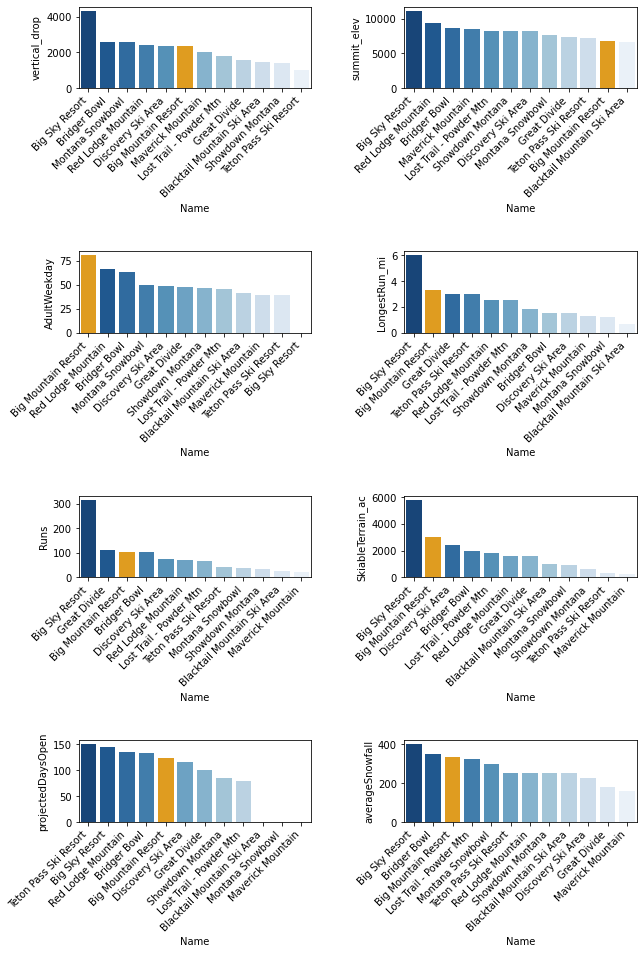

In [30]:
#Other notes/observations about Montana competition data:

#Note the visual below to see. Big Mountain is highlighted in Orange and rest are color scaled

#Big Mountain has lowest base elevation, which is good, right? Means most accessible? Easiest for beginners? But then that appeal doesn't
#usually go with a price premium - ppl would wanna pay more for a MORE advanced place for experts

#Oh boy, it's got the SECOND LOWEST peak summit elevation - another huge drawback working against it to charge a premium...

#Vert Drop wise, it's in the middle, pretty average

#It does have the second longest 'longest run' which is good

#It has one of the highest average snowfalls

#2nd highest skiable area, although a distant second

#3rd most number of runs, close to 2nd, but they're very distant from 1st place

#Amazingly, the other big- Big SKY Resort leads in just about ALL these categories - but the big unknown is PRICE
#so the big question is, what do THEY charge for their level of offerings, so Big Mountain can have something to go off of
#for how to charge / justify charging the premium that they are or whether it's completely unfounded!
#is Big Sky the most expensive?? and if so, is it at justified level?
#what would be really embarassing is if they're CHEAPER than Big Mountain when they offer apparently so much more!
#but would be interesting to compare to Big Sky to places w/ similar throughout country / in market segment?


fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10,15))

blues = sns.color_palette('Blues_r', 12)    


montana.sort_values('vertical_drop', inplace=True, ascending=False)
#montana['color'] = blues
#montana.loc[montana.Name == 'Big Mountain Resort', 'color'] = 'orange'
colors_dict = dict(zip(montana.Name, blues))
colors_dict['Big Mountain Resort'] = 'orange'
vert_drop = sns.barplot(data=montana, x='Name', y='vertical_drop', palette=colors_dict, ax=ax[0,0]) #or palette=montana.color when added column method
vert_drop.set_xticklabels(vert_drop.get_xticklabels(),rotation=45, horizontalalignment='right')


montana.sort_values('summit_elev', inplace=True, ascending=False)
colors_dict = dict(zip(montana.Name, blues))
colors_dict['Big Mountain Resort'] = 'orange'
summit = sns.barplot(data=montana, x='Name', y='summit_elev', palette=colors_dict, ax=ax[0,1])
summit.set_xticklabels(summit.get_xticklabels(),rotation=45, horizontalalignment='right')



montana.sort_values('AdultWeekday', inplace=True, ascending=False)
colors_dict = dict(zip(montana.Name, blues))
colors_dict['Big Mountain Resort'] = 'orange'
price = sns.barplot(data=montana, x='Name', y='AdultWeekday', palette=colors_dict, ax=ax[1,0])
price.set_xticklabels(price.get_xticklabels(),rotation=45, horizontalalignment='right')

          
    
montana.sort_values('LongestRun_mi', inplace=True, ascending=False)
colors_dict = dict(zip(montana.Name, blues))
colors_dict['Big Mountain Resort'] = 'orange'
longest_run = sns.barplot(data=montana, x='Name', y='LongestRun_mi', palette=colors_dict, ax=ax[1,1])
longest_run.set_xticklabels(longest_run.get_xticklabels(),rotation=45, horizontalalignment='right')



montana.sort_values('Runs', inplace=True, ascending=False)
colors_dict = dict(zip(montana.Name, blues))
colors_dict['Big Mountain Resort'] = 'orange'
runs = sns.barplot(data=montana, x='Name', y='Runs', palette=colors_dict, ax=ax[2,0])
runs.set_xticklabels(runs.get_xticklabels(),rotation=45, horizontalalignment='right')



montana.sort_values('SkiableTerrain_ac', inplace=True, ascending=False)
colors_dict = dict(zip(montana.Name, blues))
colors_dict['Big Mountain Resort'] = 'orange'
skiable_area = sns.barplot(data=montana, x='Name', y='SkiableTerrain_ac', palette=colors_dict, ax=ax[2,1])
skiable_area.set_xticklabels(skiable_area.get_xticklabels(),rotation=45, horizontalalignment='right')



montana.sort_values('projectedDaysOpen', inplace=True, ascending=False)
colors_dict = dict(zip(montana.Name, blues))
colors_dict['Big Mountain Resort'] = 'orange'
daysopen = sns.barplot(data=montana, x='Name', y='projectedDaysOpen', palette=colors_dict, ax=ax[3,0])
daysopen.set_xticklabels(daysopen.get_xticklabels(),rotation=45, horizontalalignment='right')



montana.sort_values('averageSnowfall', inplace=True, ascending=False)
colors_dict = dict(zip(montana.Name, blues))
colors_dict['Big Mountain Resort'] = 'orange'
snowfall = sns.barplot(data=montana, x='Name', y='averageSnowfall', palette=colors_dict, ax=ax[3,1])
snowfall.set_xticklabels(snowfall.get_xticklabels(),rotation=45, horizontalalignment='right')




plt.subplots_adjust(wspace=.4)
plt.subplots_adjust(hspace=2)

##### 2.6.3.5.1 Average weekend and weekday price by state<a id='2.6.3.5.1_Average_weekend_and_weekday_price_by_state'></a>

In [31]:
#Code task 14#
# Calculate average weekday and weekend price by state and sort by the average of the two
# Hint: use the pattern dataframe.groupby(<grouping variable>)[<list of columns>].mean()
state_price_means = ski_data.groupby('state')[['AdultWeekday','AdultWeekend']].mean()
state_price_means.head()


,AdultWeekday,AdultWeekend
state,,
Alaska,47.333333,57.333333
Arizona,81.500000,83.500000
California,78.214286,81.416667
Colorado,90.714286,90.714286
Connecticut,47.800000,56.800000


In [32]:
#Overall average prices

overall_price_means = ski_data[['AdultWeekday','AdultWeekend']].mean()
overall_price_means

AdultWeekday    57.916957
AdultWeekend    64.166810
dtype: float64

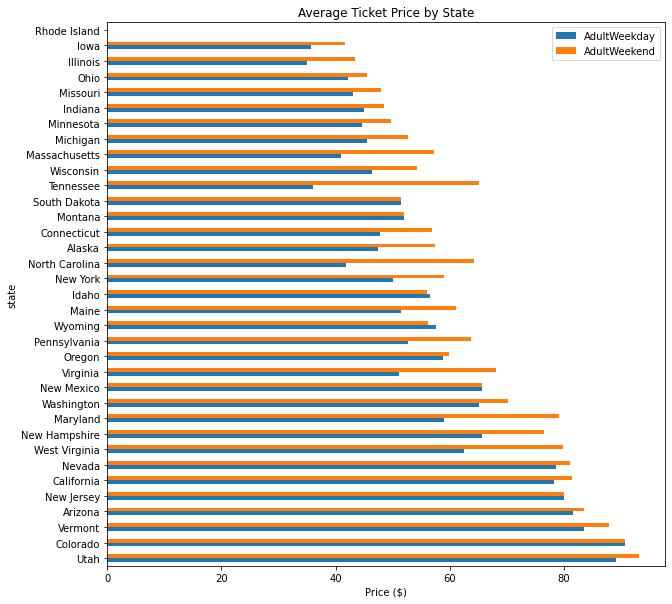

In [33]:
# The next bit simply reorders the index by increasing average of weekday and weekend prices
# Compare the index order you get from
# state_price_means.index  #the index is the states, so just a list of states
# with
# state_price_means.mean(axis=1).sort_values(ascending=False).index
#^axis=0 gives the average of averages for weekday & weekend
# axis=1 gives the average of weekday & weekend for EACH STATE
#so when we sort values descending, i.e. high to low, we sort the list by most expensive average of weekday/weekend price
#couple things to note:
#taking the average of the averages does NOT give the overall average, cuz that doesn't account for WEIGHTS, it assumes even 50/50
#second, we don't need to specify what we're sorting on because state is the INDEX so that's not counted!! there IS
#only one column to sort on which is the mean of means
#thus then when we take the index of that sorted list, it's gonna come back in that order. it's the same list of states,
#but just in a diff order, ranked by overall average of average prices. to change the order of the index / sort the index,
#we use SORT_INDEX!


# See how this expression simply sits within the reindex()
# Reindexing allows you to change / customize the index labels and also columns
# so, what the below is doing, is reindexing the index of first list of avgWkdy & avgWknd, which is just alphabetical by state,
# to the index of that latter expression above, states ordered by descending avgavgprice
# and by doing that, IT ALSO CARRIES THE VALUES W/ IT AND THUS REARRANGES ITSELF TO THAT ORDER!!!

(state_price_means.reindex(index=state_price_means.mean(axis=1) #use the index of this data in the form/order we WANT it and
    .sort_values(ascending=False)                               #(re-)set the orginal data's index to that one
    .index)
    .plot(kind='barh', figsize=(10, 10), title='Average Ticket Price by State'))
plt.xlabel('Price ($)');

In [34]:
# the 'average of the averages'
state_price_means.mean(axis=1)

state
Alaska            52.333333
Arizona           82.500000
California        79.815476
Colorado          90.714286
Connecticut       52.300000
Idaho             56.227778
Illinois          39.166667
Indiana           46.750000
Iowa              38.666667
Maine             56.250000
Maryland          69.000000
Massachusetts     49.050000
Michigan          49.017628
Minnesota         47.131429
Missouri          45.500000
Montana           51.909091
Nevada            79.750000
New Hampshire     71.035714
New Jersey        79.990000
New Mexico        65.666667
New York          54.488856
North Carolina    53.000000
Ohio              43.800000
Oregon            59.357143
Pennsylvania      58.196691
Rhode Island            NaN
South Dakota      51.500000
Tennessee         50.500000
Utah              91.041667
Vermont           85.700000
Virginia          59.500000
Washington        67.625714
West Virginia     71.125000
Wisconsin         50.347619
Wyoming           56.883333
dtype: float64

In [35]:
state_price_means.mean(axis=1).mean()

60.465904666446086

In [36]:
#the true average overall price by state would be:

sumprices = ski_data.groupby('state')[['AdultWeekday','AdultWeekend']].sum().sum(axis=1)

pricecounts = ski_data.groupby('state')[['AdultWeekday','AdultWeekend']].count().sum(axis=1).sort_index()

true_avg_price = sumprices/pricecounts  #this was tricky because couldn't simply count the number of resorts in each state
true_avg_price                          #bc lots of missing values, plus if did that way would have to double the count
                                        #since we're taking data from two diff columns for each instance
    
                                        #perhaps another way to do this would've been to MELT and combine into one column,
                                        #as we do below?

state
Alaska            52.333333
Arizona           82.500000
California        79.692308
Colorado          90.714286
Connecticut       52.300000
Idaho             56.210526
Illinois          39.166667
Indiana           46.750000
Iowa              38.666667
Maine             56.250000
Maryland          69.000000
Massachusetts     49.050000
Michigan          49.160000
Minnesota         47.131429
Missouri          45.500000
Montana           51.909091
Nevada            79.750000
New Hampshire     71.035714
New Jersey        79.990000
New Mexico        65.666667
New York          54.628125
North Carolina    53.000000
Ohio              43.800000
Oregon            59.357143
Pennsylvania      58.030303
Rhode Island            NaN
South Dakota      51.500000
Tennessee         50.500000
Utah              91.041667
Vermont           85.700000
Virginia          56.666667
Washington        67.625714
West Virginia     71.125000
Wisconsin         50.482759
Wyoming           56.818182
dtype: float64

In [37]:
true_avg_price.mean()

60.383889581391635

In [38]:
The figure above represents a dataframe with two columns, one for the average prices of each kind of ticket. This tells you how the average ticket price varies from state to state. But can you get more insight into the difference in the distributions between states?

Object `states` not found.


In [ ]:
The figure above represents a dataframe with two columns, one for the average prices of each kind of ticket. This tells you how the average ticket price varies from state to state. But can you get more insight into the difference in the distributions between states

##### 2.6.3.5.2 Distribution of weekday and weekend price by state<a id='2.6.3.5.2_Distribution_of_weekday_and_weekend_price_by_state'></a>

Next, you can transform the data into a single column for price with a new categorical column that represents the ticket type.

In [39]:
#so the idea is we wanna make it LONG and turn it into one long scroll w/ just three columns:
#state, ticket type (measure) & ticket price (value)

#but we're gonna start back w/ the orginal dataset and just list out long ALL the prices, both weekday and weekend, in
#one combined long column, and note the state of that
#the graph/plot can thn aggregate that for us into an avg

#Code task 15#
#Use the pd.melt function, pass in the ski_data columns 'state', 'AdultWeekday', and 'Adultweekend' only,
#specify 'state' for `id_vars`
#gather the ticket prices from the 'Adultweekday' and 'AdultWeekend' columns using the `value_vars` argument,
#call the resultant price column 'Price' via the `value_name` argument,
#name the weekday/weekend indicator column 'Ticket' via the `var_name` argument

#the below is my way of doing it. but beneath it is what they originally proposed
ticket_prices = ski_data.melt( 
                        id_vars='state', 
                        var_name='TicketType', 
                        value_vars=('AdultWeekday', 'AdultWeekend'), 
                        value_name='Price')

# ticket_prices = pd.melt(ski_data[['state', 'AdultWeekday', 'AdultWeekend']], 
#                         id_vars='state', 
#                         var_name='TicketType', 
#                         value_vars=['AdultWeekday', 'AdultWeekend'], 
#                         value_name='Price')

In [40]:
ticket_prices.head()

,state,TicketType,Price
0,Alaska,AdultWeekday,65.0
1,Alaska,AdultWeekday,47.0
2,Alaska,AdultWeekday,30.0
3,Arizona,AdultWeekday,89.0
4,Arizona,AdultWeekday,74.0


<AxesSubplot:xlabel='Price', ylabel='state'>

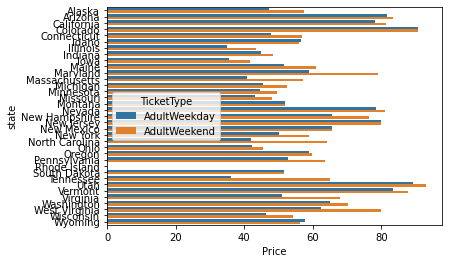

In [41]:
#rough play around
sns.barplot(data=ticket_prices, x='Price', y='state', hue='TicketType', ci=False)

array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

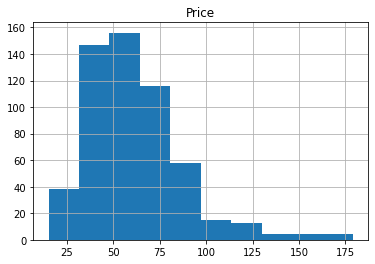

In [42]:
ticket_prices.hist()

This is now in a format we can pass to [seaborn](https://seaborn.pydata.org/)'s [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) function to create boxplots of the ticket price distributions for each ticket type for each state.

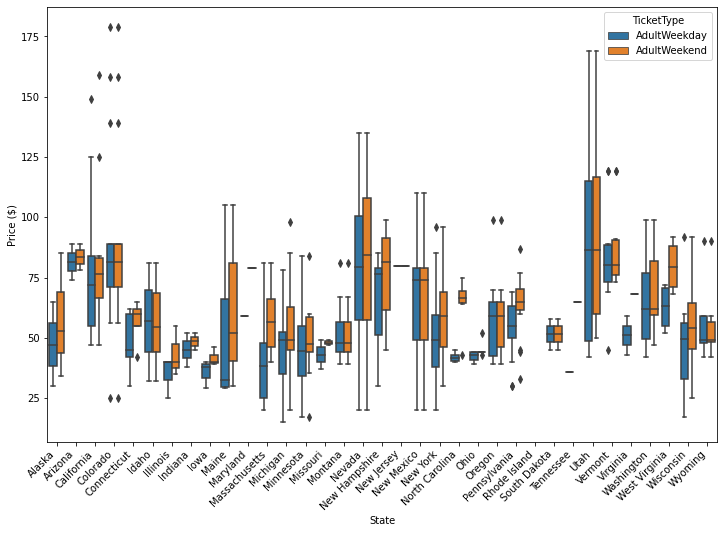

In [47]:


#Code task 16#
#Create a seaborn boxplot of the ticket price dataframe we created above,
#with 'state' on the x-axis, 'Price' as the y-value, and a hue that indicates 'Ticket'
#This will use boxplot's x, y, hue, and data arguments.
plt.subplots(figsize=(12, 8))
sns.boxplot(x='state', y='Price', hue='TicketType', data=ticket_prices)
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Price ($)')
plt.xlabel('State');

In [44]:
#the middle 50% / IQR / interquartile range:

#this is via OMITTING / IGNORING 'nan's!!

print("75th Percentile: $", np.nanquantile(ticket_prices['Price'], 0.75))

print("25th Percentile: $", np.nanquantile(ticket_prices['Price'], 0.25))

print("Interquartile Range: $", stats.iqr(ticket_prices['Price'], nan_policy='omit'))

#visually you can look at boxplot above and see this looks about right!

75th Percentile: $ 74.5
25th Percentile: $ 44.0
Interquartile Range: $ 30.5


Aside from some relatively expensive ticket prices in California, Colorado, and Utah, most prices appear to lie in a broad band from around 25 to over 100 dollars. Some States show more variability than others. Montana and South Dakota, for example, both show fairly small variability as well as matching weekend and weekday ticket prices. Nevada and Utah, on the other hand, show the most range in prices. Some States, notably North Carolina and Virginia, have weekend prices far higher than weekday prices. You could be inspired from this exploration to consider a few potential groupings of resorts, those with low spread, those with lower averages, and those that charge a premium for weekend tickets. However, you're told that you are taking all resorts to be part of the same market share, you  could argue against further segment the resorts. Nevertheless, ways to consider using the State information in your modelling include:

* disregard State completely
* retain all State information
* retain State in the form of Montana vs not Montana, as our target resort is in Montana

You've also noted another effect above: some States show a marked difference between weekday and weekend ticket prices. It may make sense to allow a model to take into account not just State but also weekend vs weekday.

Thus we currently have two main questions you want to resolve:

* What do you do about the two types of ticket price?
* What do you do about the state information?

In [45]:
#Well in Montana they literally ALL have the same prices for weekday/weekend, so maybe we don't look at the differences?
#because Montana is pretty isolated, so for ppl going there, it's not like they're comparing to other states?
#or, we can compare Montana's general prices to other's. like next door is Idaho and they're alot more expensive
#and are also about the same weekday/weekend

### 2.6.4 Numeric Features<a id='2.6.4_Numeric_Features'></a>

In [46]:
Having decided to reserve judgement on how exactly you utilize the State, turn your attention to cleaning the numeric features.

SyntaxError: invalid syntax (<ipython-input-46-13121604f3a2>, line 1)

#### 2.6.4.1 Numeric data summary<a id='2.6.4.1_Numeric_data_summary'></a>

In [48]:
#Code task 17#
#Call ski_data's `describe` method for a statistical summary of the numerical columns
#Hint: there are fewer summary stat rows than features/(columns), so displaying the transpose
#will be useful again
ski_data.describe().transpose()
#^smart!!

,count,mean,std,min,25%,50%,75%,max
summit_elev,330.0,4591.818182,3735.535934,315.0,1403.75,3127.5,7806.00,13487.0
vertical_drop,330.0,1215.427273,947.864557,60.0,461.25,964.5,1800.00,4425.0
base_elev,330.0,3374.000000,3117.121621,70.0,869.00,1561.5,6325.25,10800.0
trams,330.0,0.172727,0.559946,0.0,0.00,0.0,0.00,4.0
fastEight,164.0,0.006098,0.078087,0.0,0.00,0.0,0.00,1.0
fastSixes,330.0,0.184848,0.651685,0.0,0.00,0.0,0.00,6.0
fastQuads,330.0,1.018182,2.198294,0.0,0.00,0.0,1.00,15.0
quad,330.0,0.933333,1.312245,0.0,0.00,0.0,1.00,8.0
triple,330.0,1.500000,1.619130,0.0,0.00,1.0,2.00,8.0
double,330.0,1.833333,1.815028,0.0,1.00,1.0,3.00,14.0


In [49]:
#Hmm but notice that Big Mountain's prices are much higher than the national average for this segment
ski_data.loc[ski_data.Name =='Big Mountain Resort', ['AdultWeekday','AdultWeekend']]

,AdultWeekday,AdultWeekend
151,81.0,81.0


<AxesSubplot:xlabel='Name'>

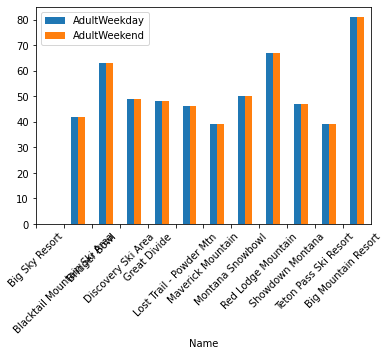

In [81]:
#And we already knew that Big Mountain had by far the highest prices in Montana!
ski_data.loc[ski_data.state =='Montana', ['Name','AdultWeekday','AdultWeekend']].plot(kind='bar', x='Name', rot=45)

Recall you're missing the ticket prices for some 16% of resorts. This is a fundamental problem that means you simply lack the required data for those resorts and will have to drop those records. But you may have a weekend price and not a weekday price, or vice versa. You want to keep any price you have.

In [ ]:
#so for now we're gonna say we have to DISREGARD / IGNORE the records with missing data - NOT treat them as 0 or deduce some
#interpolation / average

In [90]:
#the ones missing any prices / at least one (one, the other, or both)
ski_data[ski_data['AdultWeekday'].isnull() | ski_data['AdultWeekend'].isnull()][['Name','state','AdultWeekday','AdultWeekend']]

,Name,state,AdultWeekday,AdultWeekend
6,Bear Mountain,California,NaN,NaN
7,Bear Valley,California,NaN,NaN
8,Boreal Mountain Resort,California,49.0,NaN
11,Heavenly Mountain Resort,California,NaN,NaN
12,June Mountain,California,NaN,NaN
13,Kirkwood,California,NaN,NaN
18,Northstar California,California,NaN,NaN
19,Sierra-at-Tahoe,California,99.0,NaN
21,Snow Summit,California,NaN,NaN
28,Beaver Creek,Colorado,NaN,NaN


In [101]:
#The number of places with at least one missing price:
len(ski_data[ski_data['AdultWeekday'].isnull() | ski_data['AdultWeekend'].isnull()])#.count()

58

In [100]:
(ski_data.isna()['AdultWeekday'] | ski_data.isna()['AdultWeekend']).sum()

58

In [120]:
#Percent of data with at least one price missing
(ski_data.isna()['AdultWeekday'] | ski_data.isna()['AdultWeekend']).sum() / len(ski_data) * 100

17.575757575757574

In [97]:
#The num of missing in each one
ski_data.isnull().sum()[['AdultWeekday','AdultWeekend']]

AdultWeekday    54
AdultWeekend    51
dtype: int64

In [98]:
ski_data.isna().sum()[['AdultWeekday','AdultWeekend']]

AdultWeekday    54
AdultWeekend    51
dtype: int64

In [115]:
ski_data[['AdultWeekday', 'AdultWeekend']].isnull().sum()

AdultWeekday    54
AdultWeekend    51
dtype: int64

In [116]:
ski_data[['AdultWeekday','AdultWeekend']].isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
325    2
326    0
327    0
328    0
329    1
Length: 330, dtype: int64

In [117]:
#Take the list above which shows the number of blanks in each row (one, the other or both) shows the distribution
#of how many are missing (zero, one, or both)
ski_data[['AdultWeekday','AdultWeekend']].isnull().sum(axis=1).value_counts()

0    272
2     47
1     11
dtype: int64

In [126]:
#Take the above and adds the percentages of each by dividing by the number of elements
missings = pd.concat([ski_data[['AdultWeekday','AdultWeekend']].isnull().sum(axis=1).value_counts(), (ski_data[['AdultWeekday','AdultWeekend']].isnull().sum(axis=1).value_counts()) / len(ski_data) * 100], axis=1)
missings.columns=['count','%']
missings

,count,%
0,272,82.424242
2,47,14.242424
1,11,3.333333


In [ ]:
missing_price = ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price) * 100

Just over 82% of resorts have no missing ticket price, 3% are missing one value, and 14% are missing both. You will definitely want to drop the records for which you have no price information, however you will not do so just yet. There may still be useful information about the distributions of other features in that 14% of the data.

#### 2.6.4.2 Distributions Of Feature Values<a id='2.6.4.2_Distributions_Of_Feature_Values'></a>

Note that, although we are still in the 'data wrangling and cleaning' phase rather than exploratory data analysis, looking at distributions of features is immensely useful in getting a feel for whether the values look sensible and whether there are any obvious outliers to investigate. Some exploratory data analysis belongs here, and data wrangling will inevitably occur later on. It's more a matter of emphasis. Here, we're interesting in focusing on whether distributions look plausible or wrong. Later on, we're more interested in relationships and patterns.

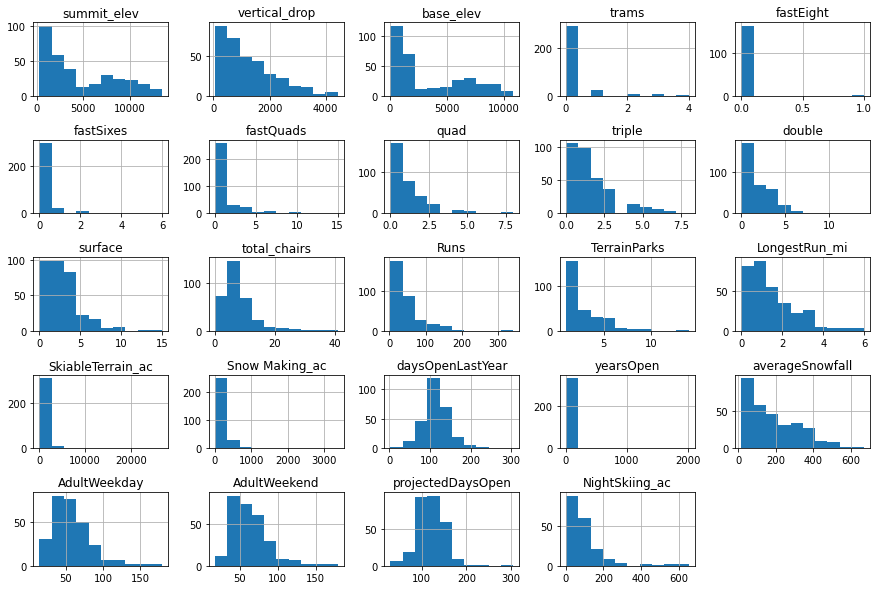

In [139]:
#Code task 18#
#Call ski_data's `hist` method to plot histograms of each of the numeric features

#GREAT WAY TO SEE QUICK OVERVIEW OF EVERYTHING!

#Try passing it an argument figsize=(15,10)
#Try calling plt.subplots_adjust() with an argument hspace=0.5 to adjust the spacing
#It's important you create legible and easy-to-read plots
ski_data.hist(figsize=(15,10));
plt.subplots_adjust(hspace=.6);
#Hint: notice how the terminating ';' "swallows" some messy output and leads to a tidier notebook
#^good look!

#would be good to create separate bin for JUST 0 and make that a diff color so you can see which ones have NOTHING. maybe
#it's obvious / apparent tho bc that only applie to stuff about the lifts/trams and the number range isn't that big so
#you can tell

In [ ]:
#so part of why we're doing this is to look for outliers
#so we can tell by looking for ones w/ really elongated x-axes and seeing if they make sense
#good example / catch is 'Years Open' - it goes up to 2000! maybe somebody put in the year OPEN*ED*! aka misinterpreted!
#and put like 1971 so it took it as been open for 1,971 years!


In [140]:
#and if you look,:
ski_data['yearsOpen'].max()

2019.0

In [ ]:
# you see that that's probably exactly what someone did!
# and that messes everything up cuz then it basically puts/lumps EVERYONE else in the 'less than 2,000' bin!

#skiable terrain acres and snow making acres are also similarly very skewed by some very high values - but it is feasible
#that's true, it's hard to know

#another important thing to look for, if possible, is to see if the total adds up to what we expect, so in this case, 330,
#or even just look for roughly that / like if it adds up to ~300 w/ a quick check
#this will give indication into whether there's MISSING VALUES (although of course you can see this w/ ski_data.isnull().sum())

#so one example of this is 'fast8's - that's extra interesting / notable because it has so many 0's!
#very skewed cuz half of them have nothing/DON'T have one/any, the rest / other half are missing / didn't report, and ONE has ONE

#'trams' is similar, very few even have one

What features do we have possible cause for concern about and why?

* SkiableTerrain_ac because values are clustered down the low end,
* Snow Making_ac for the same reason,
* fastEight because all but one value is 0 so it has very little variance, and half the values are missing,
* fastSixes raises an amber flag; it has more variability, but still mostly 0,
* trams also may get an amber flag for the same reason,
* yearsOpen because most values are low but it has a maximum of 2019, which strongly suggests someone recorded calendar year rather than number of years.

##### 2.6.4.2.1 SkiableTerrain_ac<a id='2.6.4.2.1_SkiableTerrain_ac'></a>

In [142]:
#full rows where skiable terrain is > 10,000 acres
ski_data[ski_data['SkiableTerrain_ac']>10000]

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
39,Silverton Mountain,Colorado,Colorado,13487,3087,10400,0,0.0,0,0,...,1.5,26819.0,NaN,175.0,17.0,400.0,79.0,79.0,181.0,NaN


In [144]:
#Code task 19#
#Filter the 'SkiableTerrain_ac' column to print the values greater than 10000
#just the numbers themselves
ski_data.SkiableTerrain_ac[ski_data.SkiableTerrain_ac > 10000]

39    26819.0
Name: SkiableTerrain_ac, dtype: float64

In [ ]:
#daaaang - almost 27,000 - wayyyy more than anything else!
#so is that like a typo or is that real??
#well we can fact check online and we see that
#well... this is confusing,
#on their website, in their text write-up, it says '1,819' skiable acres
#but just below that in their stats sheet it DOES say '26,819'!
#so which is it??
#well if we look at other websites and do deeper research...
#it's still conflicted!! split between these two VERY different values!!

**Q: 2** One resort has an incredibly large skiable terrain area! Which is it?

In [149]:
#Code task 20#
#Now you know there's only one, print the whole row to investigate all values, including seeing the resort name
#Hint: don't forget the transpose will be helpful here
ski_data[ski_data.SkiableTerrain_ac > 10000].transpose().head()

,39
Name,Silverton Mountain
Region,Colorado
state,Colorado
summit_elev,13487
vertical_drop,3087


#**A: 2** Answered above:

Silverton Mountain

But what can you do when you have one record that seems highly suspicious?

You can see if your data are correct. Search for "silverton mountain skiable area". If you do this, you get some [useful information](https://www.google.com/search?q=silverton+mountain+skiable+area).

![Silverton Mountain information](images/silverton_mountain_info.png)

You can spot check data. You see your top and base elevation values agree, but the skiable area is very different. Your suspect value is 26819, but the value you've just looked up is 1819. The last three digits agree. This sort of error could have occured in transmission or some editing or transcription stage. You could plausibly replace the suspect value with the one you've just obtained. Another cautionary note to make here is that although you're doing this in order to progress with your analysis, this is most definitely an issue that should have been raised and fed back to the client or data originator as a query. You should view this "data correction" step as a means to continue (documenting it carefully as you do in this notebook) rather than an ultimate decision as to what is correct.

In [154]:
#Code task 21#
#Use the .loc accessor to print the 'SkiableTerrain_ac' value only for this resort
#ski_data.loc[39, 'SkiableTerrain_ac'] >> the way they wanted us to do it, just using the index/row number as we saw from
#above, but I prefer more advanced / precise, not take the pre-solved shortcut / easy way out, want to get practice
#doing things the full way so I can more intimately and naturally understand them:

ski_data.loc[ski_data.Name=='Silverton Mountain', 'SkiableTerrain_ac']

#or in this case could've simply done: ski_data.SkiableTerrain_ac.max()

39    26819.0
Name: SkiableTerrain_ac, dtype: float64

In [150]:
ski_data.SkiableTerrain_ac.max()

26819.0

In [155]:
#Code task 22#
#Use the .loc accessor again to modify this value with the correct value of 1819
#ski_data.___[39, 'SkiableTerrain_ac'] = ___

#reassign the value
ski_data.loc[ski_data.Name=='Silverton Mountain', 'SkiableTerrain_ac'] = 1819

#check that it took:
ski_data.loc[ski_data.Name=='Silverton Mountain', 'SkiableTerrain_ac']

39    1819.0
Name: SkiableTerrain_ac, dtype: float64

In [ ]:
#Code task 23#
#Use the .loc accessor a final time to verify that the value has been modified
#ski_data.___[39, 'SkiableTerrain_ac']

#just did that above:
ski_data.loc[ski_data.Name=='Silverton Mountain', 'SkiableTerrain_ac']

**NB whilst you may become suspicious about your data quality, and you know you have missing values, you will not here dive down the rabbit hole of checking all values or web scraping to replace missing values.**

What does the distribution of skiable area look like now?

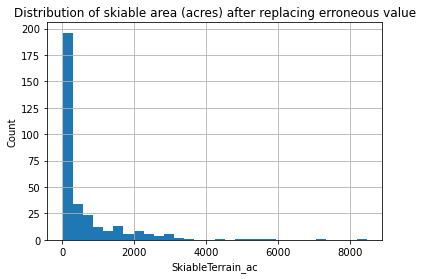

In [156]:
ski_data.SkiableTerrain_ac.hist(bins=30)
plt.xlabel('SkiableTerrain_ac')
plt.ylabel('Count')
plt.title('Distribution of skiable area (acres) after replacing erroneous value');

In [ ]:
#nice! much more lookable! / easier to look at!
#but... still pretty skewed from the few big boys / large number of smalls (skewed right)

You now see a rather long tailed distribution. You may wonder about the now most extreme value that is above 8000, but similarly you may also wonder about the value around 7000. If you wanted to spend more time manually checking values you could, but leave this for now. The above distribution is plausible.

In [ ]:
#^good point - we could go on forever fact checking, but this is good enough for now. key is we address the BIGGEST issues /
#fish and then move on, BIG outliers!

##### 2.6.4.2.2 Snow Making_ac<a id='2.6.4.2.2_Snow_Making_ac'></a>

In [158]:
#The resorts (full rows) with > 1000 acres of snow making arear
ski_data[ski_data['Snow Making_ac'] > 1000]
#only 2!

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
11,Heavenly Mountain Resort,Sierra Nevada,California,10067,3500,7170,2,0.0,2,7,...,5.5,4800.0,3379.0,155.0,64.0,360.0,NaN,NaN,157.0,NaN
18,Northstar California,Sierra Nevada,California,8610,2280,6330,2,0.0,1,7,...,1.4,3170.0,1500.0,135.0,47.0,350.0,NaN,NaN,150.0,NaN


In [159]:
#Focus in on just their / the numbers themselves:
#The set of numbers of snow making acres > 1000
ski_data['Snow Making_ac'][ski_data['Snow Making_ac'] > 1000]
#subset the column of snowmaking acres first, then within that, subset/filter for the values above 1000

11    3379.0
18    1500.0
Name: Snow Making_ac, dtype: float64

In [164]:
#ski_data.Snow Making_ac[ski_data.Snow Making_ac > 1000]
#NOTE: this is the right syntax to do the same as above but doesn't work cuz the column name has a space in it
#so that doesn't work w/ dot syntax!!

In [165]:
#another way to do the same thing
#ACHIEVES THE SAME THING BUT REVERSES/SWITCHES THE ORDER OF THE STEPS!
#LIKE NAVIGATION/GPS, SINCE WE'RE DOING ADDRESSES/COORDINATES, LIKE GOING UP THEN RIGHT VS. GOING RIGHT THEN UP >> SAME THING!
#first way above subsets / narrows in to the column first then filters down to / out for the row
#whereas / so w/ this we filter out for the ROWS first, then only select the column from/of that that we want!

ski_data[ski_data['Snow Making_ac'] > 1000]['Snow Making_ac']
#subset the rows where snowmaking_ac is > 1000, then out of that, only give the snowmaking_ac column, i.e. just return
#the snowmaking acres numbers themselves that are above 1000
#same elements if you look, just a different order. same length (sliiiighly shorter)

11    3379.0
18    1500.0
Name: Snow Making_ac, dtype: float64

In [191]:
#yet another way, w/ .loc
ski_data.loc[ski_data['Snow Making_ac'] > 1000, 'Snow Making_ac']

11    3379.0
18    1500.0
Name: Snow Making_ac, dtype: float64

In [173]:
#focus on the single biggest one:
#ski_data[ski_data['Snow Making_ac'] > 3000].T  >>  their way

#my way:
ski_data[ski_data['Snow Making_ac'] == ski_data['Snow Making_ac'].max()].T

#(shows a better intuitive understanding of what's going on, a better master of how to use the functions, ability to handle complex/multi-part commands)

#just usually easier / nicer / on the eyes to look at longer columns vs longer rows
#easier/faster for us to move our eyes DOWN vs across
#also, since our screens are almost always wider than they are longer,
#it's less to look at when we have short rows
#cuz even if it's long columns, it gets cut off anyway, so we can only look at a little at a time anyway!
#so if there's short rows / few columns, then we can just focus on a small amt at a time!

,11
Name,Heavenly Mountain Resort
Region,Sierra Nevada
state,California
summit_elev,10067
vertical_drop,3500
base_elev,7170
trams,2
fastEight,0.0
fastSixes,2
fastQuads,7


You can adopt a similar approach as for the suspect skiable area value and do some spot checking. To save time, here is a link to the website for [Heavenly Mountain Resort](https://www.skiheavenly.com/the-mountain/about-the-mountain/mountain-info.aspx). From this you can glean that you have values for skiable terrain that agree. Furthermore, you can read that snowmaking covers 60% of the trails.

In [176]:
#so:
.60 * ski_data.loc[ski_data.Name=='Heavenly Mountain Resort', 'SkiableTerrain_ac']
#okay, so that is in the ballpark, although they're selling themselves a little short

11    2880.0
Name: SkiableTerrain_ac, dtype: float64

In [180]:
#diff way to do same thing as above:
.60 * ski_data[ski_data.Name=='Heavenly Mountain Resort']['SkiableTerrain_ac']

11    2880.0
Name: SkiableTerrain_ac, dtype: float64

In [178]:
#it's actually over 70%!
ski_data.loc[ski_data.Name=='Heavenly Mountain Resort', 'Snow Making_ac'] / ski_data.loc[ski_data.Name=='Heavenly Mountain Resort', 'SkiableTerrain_ac']

11    0.703958
dtype: float64

What, then, is your rough guess for the area covered by snowmaking?

In [192]:
.6 * 4800

2880.0

This is less than the value of 3379 in your data so you may have a judgement call to make. However, notice something else. You have no ticket pricing information at all for this resort. Any further effort spent worrying about values for this resort will be wasted. You'll simply be dropping the entire row!

In [ ]:
#^good point! this is a good reminder that we shouldn't get too caught in the weeds and miss out on the garden/forest /
#bigger picture. no point overanalyzing this when we're gonna throw it out anyway!!

##### 2.6.4.2.3 fastEight<a id='2.6.4.2.3_fastEight'></a>

Look at the different fastEight values more closely:

In [193]:
ski_data.fastEight.value_counts()

0.0    163
1.0      1
Name: fastEight, dtype: int64

In [ ]:
#again, half places got nothin, other half has missing data, which prob means their 'N/A' a.k.a. they don't have one either,
#and then there's ONE that has 1

Drop the fastEight column in its entirety; half the values are missing and all but the others are the value zero. There is essentially no information in this column.

In [204]:
#good suggestion - no point including this column if we basically have no data on it / it basically doesn't apply to any subjects!
#doesn't seem to be too important / not really that standout of a feature

#Code task 24#
#Drop the 'fastEight' column from ski_data. Use inplace=True

#myway:

ski_data.drop('fastEight', axis=1, inplace=True)

#this errored when I tried running it cuz I already ran it the other way which permanently deleted the fastEight column
#so of course when i tried running this there WAS no fastEight column to drop! :P
#could be verified by running:
#ski_data.columns

#or, ask they suggest:
#ski_data.drop(columns='fastEight', inplace=True)

Index(['Name', 'Region', 'state', 'summit_elev', 'vertical_drop', 'base_elev',
       'trams', 'fastSixes', 'fastQuads', 'quad', 'triple', 'double',
       'surface', 'total_chairs', 'Runs', 'TerrainParks', 'LongestRun_mi',
       'SkiableTerrain_ac', 'Snow Making_ac', 'daysOpenLastYear', 'yearsOpen',
       'averageSnowfall', 'AdultWeekday', 'AdultWeekend', 'projectedDaysOpen',
       'NightSkiing_ac'],
      dtype='object')

What about yearsOpen? How many resorts have purportedly been open for more than 100 years?

In [206]:
#Code task 25#
#Filter the 'yearsOpen' column for values greater than 100
ski_data.yearsOpen[ski_data.yearsOpen > 100].count()

2

In [209]:
ski_data[ski_data.yearsOpen > 100][['Name', 'state', 'yearsOpen']]

,Name,state,yearsOpen
34,Howelsen Hill,Colorado,104.0
115,Pine Knob Ski Resort,Michigan,2019.0


Okay, one seems to have been open for 104 years. But beyond that, one is down as having been open for 2019 years. This is wrong! What shall you do about this?

What does the distribution of yearsOpen look like if you exclude just the obviously wrong one?

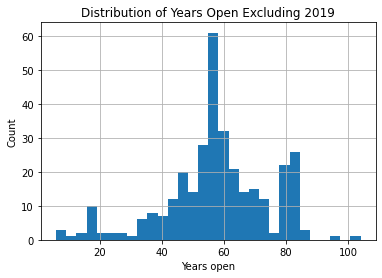

In [211]:
#Code task 26#
#Call the hist method on 'yearsOpen' after filtering for values under 1000
#Pass the argument bins=30 to hist(), but feel free to explore other values
ski_data.yearsOpen[ski_data.yearsOpen < 300].hist(bins=30)
#narrows the data down / filters it to the column/list of 'years open' numbers less than 300
plt.xlabel('Years open')
plt.ylabel('Count')
plt.title('Distribution of Years Open Excluding 2019');

In [212]:
#MUCHHHH BETTER!!!
ski_data.yearsOpen[ski_data.yearsOpen < 300].describe()

count    328.000000
mean      57.695122
std       16.841182
min        6.000000
25%       50.000000
50%       58.000000
75%       68.250000
max      104.000000
Name: yearsOpen, dtype: float64

The above distribution of years seems entirely plausible, including the 104 year value. You can certainly state that no resort will have been open for 2019 years! It likely means the resort opened in 2019. It could also mean the resort is due to open in 2019. You don't know when these data were gathered!

In [ ]:
#good point!

Let's review the summary statistics for the years under 1000.

In [213]:
ski_data.yearsOpen[ski_data.yearsOpen < 1000].describe()
#wow I just did that on my own! above

count    328.000000
mean      57.695122
std       16.841182
min        6.000000
25%       50.000000
50%       58.000000
75%       68.250000
max      104.000000
Name: yearsOpen, dtype: float64

The smallest number of years open otherwise is 6. You can't be sure whether this resort in question has been open zero years or one year and even whether the numbers are projections or actual. In any case, you would be adding a new youngest resort so it feels best to simply drop this row.

In [ ]:
#^not exactly sure what they're saying but seems like basically they wanna eliminate extreme outliers, and although this
#isn't 'extreme', it is the min, and so we'll dispose of it as we did w/ the max to help narrow down to the meat/middle/masses

In [214]:
ski_data = ski_data[ski_data.yearsOpen < 1000]
#but then doesn't this include the 6? this is simply the same set we worked w/ above that simply only drops the 2019 outlier...

##### 2.6.4.2.4 fastSixes and Trams<a id='2.6.4.2.4_fastSixes_and_Trams'></a>

The other features you had mild concern over, you will not investigate further. Perhaps take some care when using these features.

In [ ]:
#^cool yeah, let's not over do it

## 2.7 Derive State-wide Summary Statistics For Our Market Segment<a id='2.7_Derive_State-wide_Summary_Statistics_For_Our_Market_Segment'></a>

In [218]:
ski_data.groupby('state')[['summit_elev','vertical_drop']].describe() 
#specify (after 'state' in [[brackets]] which columns you actually want otherwise it's way overload!)
#also, can you specify / pick n choose which summary statistics you want w/in describe? i know you can do so w/ .agg()

summit_elev                                                \
                     count          mean          std      min       25%   
state                                                                      
Alaska                 3.0   2876.333333   954.971378   2090.0   2345.00   
Arizona                2.0  11300.000000   282.842712  11100.0  11200.00   
California            21.0   8524.476190  1019.317057   6890.0   7841.00   
Colorado              22.0  11535.772727  1527.597707   7136.0  10655.50   
Connecticut            5.0    930.000000   423.689155    525.0    720.00   
Idaho                 12.0   7415.166667  1092.892894   5650.0   6550.00   
Illinois               4.0    707.500000   260.432333    500.0    500.00   
Indiana                2.0    850.000000    70.710678    800.0    825.00   
Iowa                   3.0   1178.000000   282.005319    975.0   1017.00   
Maine                  9.0   1945.000000  1362.808589    450.0    753.00   
Maryland               1.0   3115.000000          NaN   3115.0   3115.00   
Massachusetts         11.0   1473.545455   664.568787    420.0   1091.50   
Michigan              28.0   1191.821429   376.643564    440.0    887.50   
Minnesota             14.0   1251.500000   383.947062    540.0   1063.75   
Missouri               2.0   1833.000000  1036.618541   1100.0   1466.50   
Montana               12.0   8164.583333  1241.986126   6676.0   7297.50   
Nevada                 4.0   9132.250000  1813.942369   7000.0   8155.00   
New Hampshire         16.0   2525.500000   934.509140    850.0   1985.75   
New Jersey             2.0   1103.000000   533.158513    726.0    914.50   
New Mexico             9.0  10803.888889  1023.117350   9255.0  10350.00   
New York              33.0   2145.848485   862.769672    850.0   1550.00   
North Carolina         6.0   4726.000000   842.387084   3450.0   4175.00   
Ohio                   5.0   1235.400000   332.956904    871.0    871.00   
Oregon                10.0   6742.400000  1632.620062   4000.0   5550.75   
Pennsylvania          19.0   1821.105263   656.170362    528.0   1375.00   
Rhode Island           1.0    315.000000          NaN    315.0    315.00   
South Dakota           2.0   6975.000000   176.776695   6850.0   6912.50   
Tennessee              1.0   3300.000000          NaN   3300.0   3300.00   
Utah                  13.0   9709.076923  1346.395835   6400.0   9350.00   
Vermont               15.0   3500.066667   768.875939   1200.0   3275.50   
Virginia               4.0   2847.500000   770.351651   1750.0   2631.25   
Washington            10.0   5784.500000   920.482271   3865.0   5482.50   
West Virginia          4.0   4248.250000   510.299504   3600.0   4098.75   
Wisconsin             15.0   1273.666667   286.216368    995.0   1093.00   
Wyoming                8.0   9033.625000  1119.404936   7428.0   7952.00   

                                           vertical_drop               \
                    50%       75%      max         count         mean   
state                                                                   
Alaska           2600.0   3269.50   3939.0           3.0  1444.666667   
Arizona         11300.0  11400.00  11500.0           2.0  2050.000000   
California       8383.0   8805.00  11053.0          21.0  1643.047619   
Colorado        11928.0  12484.50  13487.0          22.0  2499.863636   
Connecticut       730.0   1075.00   1600.0           5.0   510.000000   
Idaho            7391.0   7915.00   9150.0          12.0  1820.833333   
Illinois          645.0    852.50   1040.0           4.0   254.250000   
Indiana           850.0    875.00    900.0           2.0   350.000000   
Iowa             1059.0   1279.50   1500.0           3.0   350.000000   
Maine            1900.0   3140.00   4237.0           9.0  1132.444444   
Maryland         3115.0   3115.00   3115.0           1.0   700.000000   
Massachusetts    1700.0   1837.50   2380.0          11.0   632.000000   
Michigan         1170.0   1348.

You have, by this point removed one row, but it was for a resort that may not have opened yet, or perhaps in its first season. Using your business knowledge, you know that state-wide supply and demand of certain skiing resources may well factor into pricing strategies. Does a resort dominate the available night skiing in a state? Or does it account for a large proportion of the total skiable terrain or days open?

If you want to add any features to your data that captures the state-wide market size, you should do this now, before dropping any more rows. In the next section, you'll drop rows with missing price information. Although you don't know what those resorts charge for their tickets, you do know the resorts exists and have been open for at least six years. Thus, you'll now calculate some state-wide summary statistics for later use.

Many features in your data pertain to chairlifts, that is for getting people around each resort. These aren't relevant, nor are the features relating to altitudes. Features that you may be interested in are:

* TerrainParks
* SkiableTerrain_ac
* daysOpenLastYear
* NightSkiing_ac

When you think about it, these are features it makes sense to sum: the total number of terrain parks, the total skiable area, the total number of days open, and the total area available for night skiing. You might consider the total number of ski runs, but understand that the skiable area is more informative than just a number of runs.

In [219]:
ski_data.groupby('state')[['TerrainParks','SkiableTerrain_ac','daysOpenLastYear','NightSkiing_ac']].sum() 


,TerrainParks,SkiableTerrain_ac,daysOpenLastYear,NightSkiing_ac
state,,,,
Alaska,4.0,2280.0,345.0,580.0
Arizona,6.0,1577.0,237.0,80.0
California,81.0,25948.0,2738.0,587.0
Colorado,74.0,43682.0,3258.0,428.0
Connecticut,10.0,358.0,353.0,256.0
Idaho,27.0,16396.0,1136.0,415.0
Illinois,6.0,191.0,221.0,191.0
Indiana,4.0,165.0,157.0,165.0
Iowa,5.0,140.0,100.0,140.0


A fairly new groupby behaviour is [named aggregation](https://pandas-docs.github.io/pandas-docs-travis/whatsnew/v0.25.0.html). This allows us to clearly perform the aggregations you want whilst also creating informative output column names.

In [227]:
ski_data.groupby('state').agg(
    Total_Days_Open = pd.NamedAgg('daysOpenLastYear','sum'),
    Total_Terrain_Parks = pd.NamedAgg('TerrainParks','sum'),
    Total_Skiable_Acres = pd.NamedAgg('SkiableTerrain_ac','sum'),
    Total_Night_Skiing_Acres = pd.NamedAgg('NightSkiing_ac','sum'))

#NOTE: COLUMN NAMES CAN'T HAVE SPACES! CAN DO _underscores_ THO!

,Total_Days_Open,Total_Terrain_Parks,Total_Skiable_Acres,Total_Night_Skiing_Acres
state,,,,
Alaska,345.0,4.0,2280.0,580.0
Arizona,237.0,6.0,1577.0,80.0
California,2738.0,81.0,25948.0,587.0
Colorado,3258.0,74.0,43682.0,428.0
Connecticut,353.0,10.0,358.0,256.0
Idaho,1136.0,27.0,16396.0,415.0
Illinois,221.0,6.0,191.0,191.0
Indiana,157.0,4.0,165.0,165.0
Iowa,100.0,5.0,140.0,140.0


In [233]:
#Code task 27#
#Add named aggregations for the sum of 'daysOpenLastYear', 'TerrainParks', and 'NightSkiing_ac'
#call them 'state_total_days_open', 'state_total_terrain_parks', and 'state_total_nightskiing_ac', respectively
#Finally, add a call to the reset_index() method (we recommend you experiment with and without this to see
#what it does)
# state_summary = ski_data.groupby('state').agg(
#     resorts_per_state=pd.NamedAgg(column='Name', aggfunc='size'), #could pick any column here
#     state_total_skiable_area_ac=pd.NamedAgg(column='SkiableTerrain_ac', aggfunc='sum'),
#     state_total_days_open=pd.NamedAgg(column=__, aggfunc='sum'),
#     ___=pd.NamedAgg(column=___, aggfunc=___),
#     ___=pd.NamedAgg(column=___, aggfunc=___)
# ).___
# state_summary.head()

#myway:
#be efficient - no need to write out column and aggfunc every time when that's already defaulted anyway!

state_summary = ski_data.groupby('state').agg(
    Total_Resorts = pd.NamedAgg('Name','count'),   #NOTE: count and size are the same thing
    Total_Days_Open = pd.NamedAgg('daysOpenLastYear','sum'),
    Total_Terrain_Parks = pd.NamedAgg('TerrainParks','sum'),
    Total_Skiable_Acres = pd.NamedAgg('SkiableTerrain_ac','sum'),
    Total_Night_Skiing_Acres = pd.NamedAgg('NightSkiing_ac','sum'))

state_summary

#When you do .groupby, it'll make the column you grouped by as the index
#so if you reset index, as below, it'll send that groupby column back to / as a regular column
#and give it standard 0-indexing instead
#as to which to do, part of it is a personal preference as far as visual- definitely looks cleaner to keep as
#groupby indexing and lose the numbering. but some like the 0-indexing as that is the standard
#but then of course it also has implications with functionality / calling
#w/ state indexing, you can nicely index by the state name w/ .loc as we know, so state_summary.loc['Pennsylvania']
#will give us that whole row. this way you don't need to know / look up what NUMBER index it is. just do it / get to it
#directly in one shot
#but then a downside (don't know if this is really much of a downside cuz you may not even need to do this and
#if you do need to there's always another just as easy way?) is when/if you wanna call/refer to/subset this new
#summary/groupby table by the state column, there IS NO 'state' column anymore. so state_summary['state'] would result in
#an error. but again, why would you need to do that in this scenario anyway? if you wanted to home in on one cell would
#simply do so by .loc'ing using the state as an index, which is easier than doing 'colName'=='suchandsuch', and then tacking
#on the column you want!

#state_summary.reset_index(inplace=True)

,Total_Resorts,Total_Days_Open,Total_Terrain_Parks,Total_Skiable_Acres,Total_Night_Skiing_Acres
state,,,,,
Alaska,3,345.0,4.0,2280.0,580.0
Arizona,2,237.0,6.0,1577.0,80.0
California,21,2738.0,81.0,25948.0,587.0
Colorado,22,3258.0,74.0,43682.0,428.0
Connecticut,5,353.0,10.0,358.0,256.0
Idaho,12,1136.0,27.0,16396.0,415.0
Illinois,4,221.0,6.0,191.0,191.0
Indiana,2,157.0,4.0,165.0,165.0
Iowa,3,100.0,5.0,140.0,140.0


## 2.8 Drop Rows With No Price Data<a id='2.8_Drop_Rows_With_No_Price_Data'></a>

You know there are two columns that refer to price: 'AdultWeekend' and 'AdultWeekday'. You can calculate the number of price values missing per row. This will obviously have to be either 0, 1, or 2, where 0 denotes no price values are missing and 2 denotes that both are missing.

In [262]:
#identify the rows with at least one price value missing
#already did this above!:
#reproduced below:

#OKAY SO ORIGINALLY I GOT AHEAD OF MYSELF AND DROPPED ROWS THAT HAD **ANY** MISSING PRICES, BUT TURNS OUT THEY
#ONLY WANT US TO DELETE ONES THAT HAVE **BOTH** PRICES MISSING, SO GONNA #COMMENT# MY WORK BELOW AND HAVE TO GET THE ORIGINAL
#DATASET BACK TO THE STATE/POINT IT WAS BEFORE I MESSED IT UP (DIDN'T WANNA GO BACK IN VERSIONS AND LOSE ALL THIS WORK!)

ski_data = pd.read_csv('../raw_data/ski_resort_data.csv')
ski_data.drop('fastEight', axis=1, inplace=True)
ski_data = ski_data[ski_data.yearsOpen < 1000]

#maybe/probably could've just restarted kernel w/ new code but didn't wanna risk it....

#any_missing_prices_rows = ski_data[ski_data['AdultWeekday'].isnull() | ski_data['AdultWeekend'].isnull()] #leave as the whole row. can't subset, won't work / will result in error

#how do i make it drop these rows?

#can redefine df to equal everything but these

#ski_data = ski_data[~ski_data.Name.isin(any_missing_prices_rows.Name)]

#is there a way to do this w/ .loc?

#is there a way to drop w/ .drop? w/ axis 0, but either need to refer to index, or


#here's how it'd look if we wanted to do it sequentially, like first just removing the ones with BOTH missing!

#the full rows where BOTH prices are missing!
missing_both = ski_data[ski_data['AdultWeekday'].isnull() & ski_data['AdultWeekend'].isnull()]

#then reassign ski_data to be the ones that AREN'T equal to these, based on comparing a common column, like:

ski_data = ski_data[~ski_data.Name.isin(missing_both.Name)]

#had to make sure the one double, 'Crystal Mountain', wasn't amongst the missing!

#or can do by

#ski_data = where the value of a column is NOT equal to some specified value
#where adultweekday is blank and adultweekday is blank

#the way they want us to do it is just subset the two price columns and count the blanks across/between them
#and simply only keep the ones that DON'T HAVE both blank!

#ski_data = ski_data[ski_data['AdultWeekday'].isnull()==False &  ski_data['AdultWeekend'].isnull()==False]
#for some reason this doesn't work, although when i try each condition independently it works?                                                           

ski_data

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0,2,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,1,0,2,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0,1,2,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,Hogadon Basin,Wyoming,Wyoming,8000,640,7400,0,0,0,0,...,0.6,92.0,32.0,121.0,61.0,80.0,48.0,48.0,95.0,NaN
326,Sleeping Giant Ski Resort,Wyoming,Wyoming,7428,810,6619,0,0,0,0,...,1.0,184.0,18.0,61.0,81.0,310.0,42.0,42.0,77.0,NaN
327,Snow King Resort,Wyoming,Wyoming,7808,1571,6237,0,0,0,1,...,1.0,400.0,250.0,121.0,80.0,300.0,59.0,59.0,123.0,110.0
328,Snowy Range Ski & Recreation Area,Wyoming,Wyoming,9663,990,8798,0,0,0,0,...,0.7,75.0,30.0,131.0,59.0,250.0,49.0,49.0,NaN,NaN


In [263]:
missing_both

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
6,Bear Mountain,Sierra Nevada,California,8805,1665,7140,0,0,2,1,...,1.5,198.0,198.0,122.0,76.0,100.0,NaN,NaN,130.0,NaN
7,Bear Valley,Sierra Nevada,California,8500,1900,6600,0,1,1,0,...,1.2,1680.0,100.0,165.0,52.0,359.0,NaN,NaN,151.0,NaN
11,Heavenly Mountain Resort,Sierra Nevada,California,10067,3500,7170,2,2,7,1,...,5.5,4800.0,3379.0,155.0,64.0,360.0,NaN,NaN,157.0,NaN
12,June Mountain,Sierra Nevada,California,10090,2590,7545,0,0,2,0,...,2.0,1500.0,NaN,NaN,58.0,250.0,NaN,NaN,128.0,NaN
13,Kirkwood,Sierra Nevada,California,9800,2000,7800,0,0,2,1,...,2.5,2300.0,200.0,200.0,47.0,354.0,NaN,NaN,167.0,NaN
18,Northstar California,Sierra Nevada,California,8610,2280,6330,2,1,7,1,...,1.4,3170.0,1500.0,135.0,47.0,350.0,NaN,NaN,150.0,NaN
21,Snow Summit,Sierra Nevada,California,8200,1200,7000,0,0,2,0,...,1.2,240.0,240.0,NaN,67.0,100.0,NaN,NaN,130.0,150.0
28,Beaver Creek,Colorado,Colorado,11440,3340,8100,2,0,11,0,...,2.8,1832.0,650.0,145.0,39.0,323.0,NaN,NaN,138.0,NaN
29,Breckenridge,Colorado,Colorado,12998,3398,9600,1,5,6,0,...,3.5,2908.0,600.0,182.0,58.0,300.0,NaN,NaN,163.0,NaN
31,Crested Butte Mountain Resort,Colorado,Colorado,12162,3062,9375,0,0,4,2,...,2.6,1547.0,297.0,145.0,58.0,234.0,NaN,NaN,131.0,NaN


In [264]:
#check using one of the missings that should've been removed
#there were 47 rows with both missing, as seen in above
ski_data[ski_data.Name=='Bear Mountain']

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac


In [ ]:
#good! not there anymore!

In [265]:
missing_price = ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum(axis=1)
#this shows you the number of blanks between these two columns in ALL the rows
missing_price.value_counts()/len(missing_price) * 100
#then you can see the breakout of missing one, missing both, or missing 0 - as we've seen before

0    96.085409
1     3.914591
dtype: float64

In [266]:
missing_price

0      0
1      0
2      0
3      0
4      0
      ..
323    0
326    0
327    0
328    0
329    1
Length: 281, dtype: int64

About 14% of the rows have no price data. As the price is your target, these rows are of no use. Time to lose them.

In [267]:
#this will do what we've already done, which is to remove 
#Code task 28#
#Use `missing_price` to remove rows from ski_data where both price values are missing
ski_data = ski_data[missing_price != 2]
#can't do it like this using my way cuz we're not comparing to just one single value, comparing to a WHOLE LIST, THAT'S
#why hadda use .isin()
#this^ will still work on mine cuz i already deleted out the ones w/ both missing so there ARE no 2's! it IS all 1's and 0's

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0,2,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,1,0,2,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0,1,2,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,Hogadon Basin,Wyoming,Wyoming,8000,640,7400,0,0,0,0,...,0.6,92.0,32.0,121.0,61.0,80.0,48.0,48.0,95.0,NaN
326,Sleeping Giant Ski Resort,Wyoming,Wyoming,7428,810,6619,0,0,0,0,...,1.0,184.0,18.0,61.0,81.0,310.0,42.0,42.0,77.0,NaN
327,Snow King Resort,Wyoming,Wyoming,7808,1571,6237,0,0,0,1,...,1.0,400.0,250.0,121.0,80.0,300.0,59.0,59.0,123.0,110.0
328,Snowy Range Ski & Recreation Area,Wyoming,Wyoming,9663,990,8798,0,0,0,0,...,0.7,75.0,30.0,131.0,59.0,250.0,49.0,49.0,NaN,NaN


## 2.9 Review distributions<a id='2.9_Review_distributions'></a>

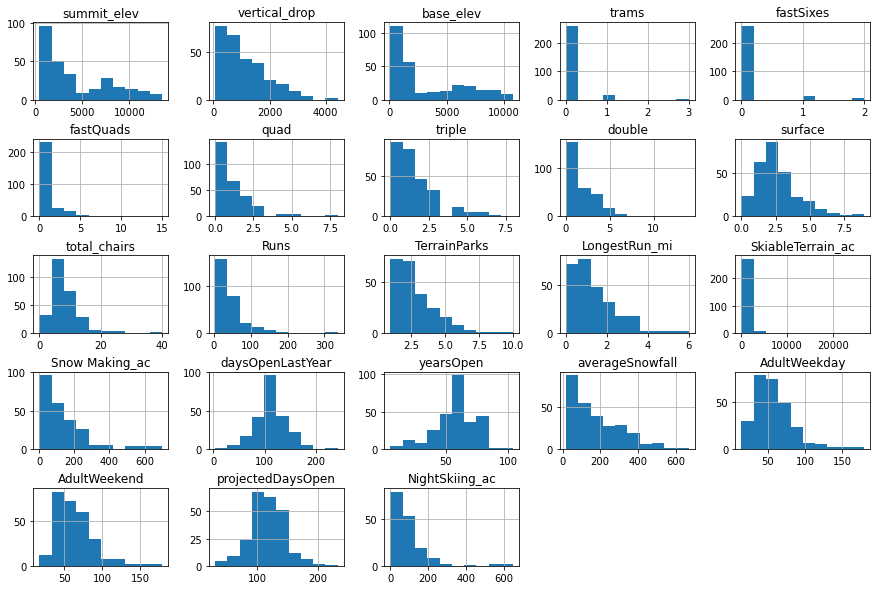

In [268]:
#let's see how things look like now that we took out the ones without both price data and the extremists
#don't see nearly the crazy skews and outliers!
ski_data.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

These distributions are much better. There are clearly some skewed distributions, so keep an eye on `fastQuads`, `fastSixes`, and perhaps `trams`. These lack much variance away from 0 and may have a small number of relatively extreme values.  Models failing to rate a feature as important when domain knowledge tells you it should be is an issue to look out for, as is a model being overly influenced by some extreme values. If you build a good machine learning pipeline, hopefully it will be robust to such issues, but you may also wish to consider nonlinear transformations of features.

## 2.10 Population data<a id='2.10_Population_data'></a>

Population and area data for the US states can be obtained from [wikipedia](https://simple.wikipedia.org/wiki/List_of_U.S._states). Listen, you should have a healthy concern about using data you "found on the Internet". Make sure it comes from a reputable source. This table of data is useful because it allows you to easily pull and incorporate an external data set. It also allows you to proceed with an analysis that includes state sizes and populations for your 'first cut' model. Be explicit about your source (we documented it here in this workflow) and ensure it is open to inspection. All steps are subject to review, and it may be that a client has a specific source of data they trust that you should use to rerun the analysis.

In [269]:
#Code task 29#
#Use pandas' `read_html` method to read the table from the URL below
states_url = 'https://simple.wikipedia.org/w/index.php?title=List_of_U.S._states&oldid=7168473'
usa_states = pd.read_html(states_url)

In [272]:
usa_states

[   Name &postal abbs. [1]                                   Cities  \
    Name &postal abbs. [1] Name &postal abbs. [1].1         Capital   
 0                 Alabama                       AL      Montgomery   
 1                  Alaska                       AK          Juneau   
 2                 Arizona                       AZ         Phoenix   
 3                Arkansas                       AR     Little Rock   
 4              California                       CA      Sacramento   
 5                Colorado                       CO          Denver   
 6             Connecticut                       CT        Hartford   
 7                Delaware                       DE           Dover   
 8                 Florida                       FL     Tallahassee   
 9                 Georgia                       GA         Atlanta   
 10                Hawaiʻi                       HI        Honolulu   
 11                  Idaho                       ID           Boise   
 12   

In [270]:
type(usa_states)

list

In [ ]:
#it's like a list of lists?

In [271]:
len(usa_states)

1

In [ ]:
#its length is 1 cuz it's '1' list? shouldn't the len be the number of elements in the list?
#no - the length DOES represent the number of elements
#so that means it's NOT a list of lists, it's literally just one list with ONE really LONG element!
#like its whole contents is just one single element!!
#notice there's no commas - if it was comma separated then there'd be multiple elements
#and if there were more sets of brackets like for each line there'd be multiple lists!

In [273]:
usa_states[0]

Name &postal abbs. [1]                                   Cities  \
   Name &postal abbs. [1] Name &postal abbs. [1].1         Capital   
0                 Alabama                       AL      Montgomery   
1                  Alaska                       AK          Juneau   
2                 Arizona                       AZ         Phoenix   
3                Arkansas                       AR     Little Rock   
4              California                       CA      Sacramento   
5                Colorado                       CO          Denver   
6             Connecticut                       CT        Hartford   
7                Delaware                       DE           Dover   
8                 Florida                       FL     Tallahassee   
9                 Georgia                       GA         Atlanta   
10                Hawaiʻi                       HI        Honolulu   
11                  Idaho                       ID           Boise   
12               Illinois                       IL     Springfield   
13                Indiana                       IN    Indianapolis   
14                   Iowa                       IA      Des Moines   
15                 Kansas                       KS          Topeka   
16            Kentucky[C]                       KY       Frankfort   
17              Louisiana                       LA     Baton Rouge   
18                  Maine                       ME         Augusta   
19               Maryland                       MD       Annapolis   
20       Massachusetts[C]                       MA          Boston   
21               Michigan                       MI         Lansing   
22              Minnesota                       MN        St. Paul   
23            Mississippi                       MS         Jackson   
24               Missouri                       MO  Jefferson City   
25                Montana                       MT          Helena   
26               Nebraska                       NE         Lincoln   
27                 Nevada                       NV     Carson City   
28          New Hampshire                       NH         Concord   
29             New Jersey                       NJ         Trenton   
30             New Mexico                       NM        Santa Fe   
31               New York                       NY          Albany   
32         North Carolina                       NC         Raleigh   
33           North Dakota                       ND        Bismarck   
34                   Ohio                       OH        Columbus   
35               Oklahoma                       OK   Oklahoma City   
36                 Oregon                       OR           Salem   
37        Pennsylvania[C]                       PA      Harrisburg   
38        Rhode Island[D]                       RI      Providence   
39         South Carolina                       SC        Columbia   
40           South Dakota                       SD          Pierre   
41              Tennessee                       TN       Nashville   
42                  Texas                       TX          Austin   
43                   Utah                       UT  Salt Lake City   
44                Vermont                       VT      Montpelier   
45            Virginia[C]                       VA        Richmond   
46             Washington                       WA         Olympia   
47          West Virginia                       WV      Charleston   
48              Wisconsin                       WI         Madison   
49                Wyoming                       WY        Cheyenne   

                   Established[A] Population[B][3] Total area[4]           \
        Largest[5] Established[A] Population[B][3]           mi2      km2   
0       Birmingham   Dec 14, 1819          4903185         52420   135767   
1        Anchorage    Jan 3, 1959           731545        665384  1723337   
2          Phoenix   Feb 14, 1912          7278717    

In [ ]:
#ohh shoot wow so it turns it into a nice formatted table rather than a plain text bracketed list block

In [284]:
usa_states.loc[[1]]
#just to prove a point / prove the point above, the list is one single element -> 1 row, 1 column. it's just python is
#nice enough to display as a table for us (like csv text-to-columns) but it's a mirage
#try this again after we convert it to a table below!

Name &postal abbs. [1]                           Cities             \
  Name &postal abbs. [1] Name &postal abbs. [1].1 Capital Largest[5]   
1                 Alaska                       AK  Juneau  Anchorage   

  Established[A] Population[B][3] Total area[4]          Land area[4]  \
  Established[A] Population[B][3]           mi2      km2          mi2   
1    Jan 3, 1959           731545        665384  1723337       570641   

           Water area[4]         Numberof Reps.  
       km2           mi2     km2 Numberof Reps.  
1  1477953         94743  245384              1

In [281]:
usa_states.iloc[1,1]
#again to further prove the point there is no table (otherwise this would give the contents at this ordered coordinate pair)
#in fact, you could say that the address is [0,0] since it's one single element, but that still wouldn't work cuz
#A LIST DOESN'T / CAN'T HAVE THE ATTRIBUTE .ILOC!
#NOTE - once we convert it to a table as we do below and you come back to this THEN it will work!!

'AK'

In [277]:
usa_states = usa_states[0]
usa_states.head()
#this converts it to a table with subscriptable / subsettable rows & columns! >> A PANDAS DATAFRAME!

Name &postal abbs. [1]                                Cities               \
  Name &postal abbs. [1] Name &postal abbs. [1].1      Capital   Largest[5]   
0                Alabama                       AL   Montgomery   Birmingham   
1                 Alaska                       AK       Juneau    Anchorage   
2                Arizona                       AZ      Phoenix      Phoenix   
3               Arkansas                       AR  Little Rock  Little Rock   
4             California                       CA   Sacramento  Los Angeles   

  Established[A] Population[B][3] Total area[4]          Land area[4]  \
  Established[A] Population[B][3]           mi2      km2          mi2   
0   Dec 14, 1819          4903185         52420   135767        50645   
1    Jan 3, 1959           731545        665384  1723337       570641   
2   Feb 14, 1912          7278717        113990   295234       113594   
3   Jun 15, 1836          3017804         53179   137732        52035   
4    Sep 9, 1850         39512223        163695   423967       155779   

           Water area[4]         Numberof Reps.  
       km2           mi2     km2 Numberof Reps.  
0   131171          1775    4597              7  
1  1477953         94743  245384              1  
2   294207           396    1026              9  
3   134771          1143    2961              4  
4   403466          7916   20501             53

In [291]:
#check for yourself
type(usa_states)

pandas.core.frame.DataFrame

In [ ]:
#nice, it knows how to handle a merged cell like phoenix by replicating it
#and notice how it does the same for VERTICALLY merged cells like Established and Population - duplicates it to reconcile the gaps

Note, in even the last year, the capability of `pd.read_html()` has improved. The merged cells you see in the web table are now handled much more conveniently, with 'Phoenix' now being duplicated so the subsequent columns remain aligned. But check this anyway. If you extract the established date column, you should just get dates. Recall previously you used the `.loc` accessor, because you were using labels. Now you want to refer to a column by its index position and so use `.iloc`. For a discussion on the difference use cases of `.loc` and `.iloc` refer to the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html).

In [288]:
#Code task 30#
#Use the iloc accessor to get the pandas Series for column number 4 from `usa_states`
#It should be a column of dates
established = usa_states.iloc[:,4]
#this will give us the fifth column (thru index 4)

In [289]:
#viola
established

0     Dec 14, 1819
1      Jan 3, 1959
2     Feb 14, 1912
3     Jun 15, 1836
4      Sep 9, 1850
5      Aug 1, 1876
6      Jan 9, 1788
7      Dec 7, 1787
8      Mar 3, 1845
9      Jan 2, 1788
10    Aug 21, 1959
11     Jul 3, 1890
12     Dec 3, 1818
13    Dec 11, 1816
14    Dec 28, 1846
15    Jan 29, 1861
16     Jun 1, 1792
17    Apr 30, 1812
18    Mar 15, 1820
19    Apr 28, 1788
20     Feb 6, 1788
21    Jan 26, 1837
22    May 11, 1858
23    Dec 10, 1817
24    Aug 10, 1821
25     Nov 8, 1889
26     Mar 1, 1867
27    Oct 31, 1864
28    Jun 21, 1788
29    Dec 18, 1787
30     Jan 6, 1912
31    Jul 26, 1788
32    Nov 21, 1789
33     Nov 2, 1889
34     Mar 1, 1803
35    Nov 16, 1907
36    Feb 14, 1859
37    Dec 12, 1787
38    May 29, 1790
39    May 23, 1788
40     Nov 2, 1889
41     Jun 1, 1796
42    Dec 29, 1845
43     Jan 4, 1896
44     Mar 4, 1791
45    Jun 25, 1788
46    Nov 11, 1889
47    Jun 20, 1863
48    May 29, 1848
49    Jul 10, 1890
Name: (Established[A], Established[A]), dtype: obj

Extract the state name, population, and total area (square miles) columns.

In [292]:
#Code task 31#
#Now use the iloc accessor again to extract columns 0, 5, and 6 and the dataframe's `copy()` method
#Set the names of these extracted columns to 'state', 'state_population', and 'state_area_sq_miles',
#respectively.
usa_states_sub = usa_states.iloc[:, [0,5,6]].copy()
#do we need to make a copy if we're assigning a new variable anyway isn't that already making a copy?
usa_states_sub.columns = ['state', 'state_population', 'state_area_sq_miles']
usa_states_sub.head()

,state,state_population,state_area_sq_miles
0,Alabama,4903185,52420
1,Alaska,731545,665384
2,Arizona,7278717,113990
3,Arkansas,3017804,53179
4,California,39512223,163695


In [293]:
usa_states

Name &postal abbs. [1]                                   Cities  \
   Name &postal abbs. [1] Name &postal abbs. [1].1         Capital   
0                 Alabama                       AL      Montgomery   
1                  Alaska                       AK          Juneau   
2                 Arizona                       AZ         Phoenix   
3                Arkansas                       AR     Little Rock   
4              California                       CA      Sacramento   
5                Colorado                       CO          Denver   
6             Connecticut                       CT        Hartford   
7                Delaware                       DE           Dover   
8                 Florida                       FL     Tallahassee   
9                 Georgia                       GA         Atlanta   
10                Hawaiʻi                       HI        Honolulu   
11                  Idaho                       ID           Boise   
12               Illinois                       IL     Springfield   
13                Indiana                       IN    Indianapolis   
14                   Iowa                       IA      Des Moines   
15                 Kansas                       KS          Topeka   
16            Kentucky[C]                       KY       Frankfort   
17              Louisiana                       LA     Baton Rouge   
18                  Maine                       ME         Augusta   
19               Maryland                       MD       Annapolis   
20       Massachusetts[C]                       MA          Boston   
21               Michigan                       MI         Lansing   
22              Minnesota                       MN        St. Paul   
23            Mississippi                       MS         Jackson   
24               Missouri                       MO  Jefferson City   
25                Montana                       MT          Helena   
26               Nebraska                       NE         Lincoln   
27                 Nevada                       NV     Carson City   
28          New Hampshire                       NH         Concord   
29             New Jersey                       NJ         Trenton   
30             New Mexico                       NM        Santa Fe   
31               New York                       NY          Albany   
32         North Carolina                       NC         Raleigh   
33           North Dakota                       ND        Bismarck   
34                   Ohio                       OH        Columbus   
35               Oklahoma                       OK   Oklahoma City   
36                 Oregon                       OR           Salem   
37        Pennsylvania[C]                       PA      Harrisburg   
38        Rhode Island[D]                       RI      Providence   
39         South Carolina                       SC        Columbia   
40           South Dakota                       SD          Pierre   
41              Tennessee                       TN       Nashville   
42                  Texas                       TX          Austin   
43                   Utah                       UT  Salt Lake City   
44                Vermont                       VT      Montpelier   
45            Virginia[C]                       VA        Richmond   
46             Washington                       WA         Olympia   
47          West Virginia                       WV      Charleston   
48              Wisconsin                       WI         Madison   
49                Wyoming                       WY        Cheyenne   

                   Established[A] Population[B][3] Total area[4]           \
        Largest[5] Established[A] Population[B][3]           mi2      km2   
0       Birmingham   Dec 14, 1819          4903185         52420   135767   
1        Anchorage    Jan 3, 1959           731545        665384  1723337   
2          Phoenix   Feb 14, 1912          7278717    

Do you have all the ski data states accounted for?

In [ ]:
#ohh haha it's not gonna find a match w/ the COMMONWEALTH states like PA, MA, VA, KY!

In [296]:
#GOTTA BRING THIS BACK SO WE CAN RESET THE INDEX SINCE WE DIDN'T WANNA DO IT BEFORE BUT I GUESS THIS IS A SCENARIO WHEN/WHERE
#YOU WANNA TAKE THE STATE COLUMN TO DO A COMPARISON OF WHICH STATES ARE IN THIS LIST COMPARED TO ANOTHER LIST!
state_summary.reset_index(inplace=True)

In [297]:
state_summary

,state,Total_Resorts,Total_Days_Open,Total_Terrain_Parks,Total_Skiable_Acres,Total_Night_Skiing_Acres
0,Alaska,3,345.0,4.0,2280.0,580.0
1,Arizona,2,237.0,6.0,1577.0,80.0
2,California,21,2738.0,81.0,25948.0,587.0
3,Colorado,22,3258.0,74.0,43682.0,428.0
4,Connecticut,5,353.0,10.0,358.0,256.0
5,Idaho,12,1136.0,27.0,16396.0,415.0
6,Illinois,4,221.0,6.0,191.0,191.0
7,Indiana,2,157.0,4.0,165.0,165.0
8,Iowa,3,100.0,5.0,140.0,140.0
9,Maine,9,865.0,17.0,3216.0,388.0


In [298]:
#Code task 32#
#Find the states in `state_summary` that are not in `usa_states_sub`
#Hint: set(list1) - set(list2) is an easy way to get items in list1 that are not in list2
missing_states = set(state_summary.state) - set(usa_states_sub.state)
missing_states

{'Massachusetts', 'Pennsylvania', 'Rhode Island', 'Virginia'}

In [ ]:
#WAIT WHY DOES RHODE ISLAND HAVE A [D]??? THAT DOESN'T SHOW UP ON THE WIKI PAGE???

No?? 

If you look at the table on the web, you can perhaps start to guess what the problem is. You can confirm your suspicion by pulling out state names that _contain_ 'Massachusetts', 'Pennsylvania', or 'Virginia' from usa_states_sub:

In [ ]:
usa_states_sub.state[usa_states_sub.state.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia')]

Delete square brackets and their contents and try again:

In [ ]:
#Code task 33#
#Use pandas' Series' `replace()` method to replace anything within square brackets (including the brackets)
#with the empty string. Do this inplace, so you need to specify the arguments:
#to_replace='\[.*\]' #literal square bracket followed by anything or nothing followed by literal closing bracket
#value='' #empty string as replacement
#regex=True #we used a regex in our `to_replace` argument
#inplace=True #Do this "in place"
usa_states_sub.state.___(to_replace=___, value=__, regex=___, inplace=___)
usa_states_sub.state[usa_states_sub.state.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia')]

In [ ]:
#Code task 34#
#And now verify none of our states are missing by checking that there are no states in
#state_summary that are not in usa_states_sub (as earlier using `set()`)
missing_states = ___(state_summary.state) - ___(usa_states_sub.state)
missing_states

Better! You have an empty set for missing states now. You can confidently add the population and state area columns to the ski resort data.

In [ ]:
#Code task 35#
#Use 'state_summary's `merge()` method to combine our new data in 'usa_states_sub'
#specify the arguments how='left' and on='state'
state_summary = state_summary.___(usa_states_sub, ___=___, ___=___)
state_summary.head()

Having created this data frame of summary statistics for various states, it would seem obvious to join this with the ski resort data to augment it with this additional data. You will do this, but not now. In the next notebook you will be exploring the data, including the relationships between the states. For that you want a separate row for each state, as you have here, and joining the data this soon means you'd need to separate and eliminate redundances in the state data when you wanted it.

## 2.11 Target Feature<a id='2.11_Target_Feature'></a>

Finally, what will your target be when modelling ticket price? What relationship is there between weekday and weekend prices?

In [ ]:
#Code task 36#
#Use ski_data's `plot()` method to create a scatterplot (kind='scatter') with 'AdultWeekday' on the x-axis and
#'AdultWeekend' on the y-axis
ski_data.___(x=___, y=___, kind=___);

A couple of observations can be made. Firstly, there is a clear line where weekend and weekday prices are equal. Weekend prices being higher than weekday prices seem restricted to sub $100 resorts. Recall from the boxplot earlier that the distribution for weekday and weekend prices in Montana seemed equal. Is this confirmed in the actual data for each resort? Big Mountain resort is in Montana, so the relationship between these quantities in this state are particularly relevant.

In [ ]:
#Code task 37#
#Use the loc accessor on ski_data to print the 'AdultWeekend' and 'AdultWeekday' columns for Montana only
ski_data.___[ski_data.state == ___, [___, ___]]

Is there any reason to prefer weekend or weekday prices? Which is missing the least?

In [ ]:
ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum()

Weekend prices have the least missing values of the two, so drop the weekday prices and then keep just the rows that have weekend price.

In [ ]:
ski_data.drop(columns='AdultWeekday', inplace=True)
ski_data.dropna(subset=['AdultWeekend'], inplace=True)

In [ ]:
ski_data.shape

Perform a final quick check on the data.

### 2.11.1 Number Of Missing Values By Row - Resort<a id='2.11.1_Number_Of_Missing_Values_By_Row_-_Resort'></a>

Having dropped rows missing the desired target ticket price, what degree of missingness do you have for the remaining rows?

In [ ]:
missing = pd.concat([ski_data.isnull().sum(axis=1), 100 * ski_data.isnull().mean(axis=1)], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False).head(10)

These seem possibly curiously quantized...

In [ ]:
missing['%'].unique()

Yes, the percentage of missing values per row appear in multiples of 4.

In [ ]:
missing['%'].value_counts()

This is almost as if values have been removed artificially... Nevertheless, what you don't know is how useful the missing features are in predicting ticket price. You shouldn't just drop rows that are missing several useless features.

In [ ]:
ski_data.info()

There are still some missing values, and it's good to be aware of this, but leave them as is for now.

## 2.12 Save data<a id='2.12_Save_data'></a>

In [ ]:
ski_data.shape

Save this to your data directory, separately. Note that you were provided with the data in `raw_data` and you should saving derived data in a separate location. This guards against overwriting our original data.

In [ ]:
# save the data to a new csv file
datapath = '../data'
save_file(ski_data, 'ski_data_cleaned.csv', datapath)

In [ ]:
# save the state_summary separately.
datapath = '../data'
save_file(state_summary, 'state_summary.csv', datapath)

## 2.13 Summary<a id='2.13_Summary'></a>

**Q: 3** Write a summary statement that highlights the key processes and findings from this notebook. This should include information such as the original number of rows in the data, whether our own resort was actually present etc. What columns, if any, have been removed? Any rows? Summarise the reasons why. Were any other issues found? What remedial actions did you take? State where you are in the project. Can you confirm what the target feature is for your desire to predict ticket price? How many rows were left in the data? Hint: this is a great opportunity to reread your notebook, check all cells have been executed in order and from a "blank slate" (restarting the kernel will do this), and that your workflow makes sense and follows a logical pattern. As you do this you can pull out salient information for inclusion in this summary. Thus, this section will provide an important overview of "what" and "why" without having to dive into the "how" or any unproductive or inconclusive steps along the way.

**A: 3** Your answer here